# Data Science and Machine Learning Using Python
---
**Guidelines**
* Using the dataset provided, create a binary classification.
* Perform the following:
  * Perform an exploratory analysis (scaling, PCA, unbalanced)
  * Split the data (train, validation, test)
  * Perform 10-fold cross-validation and grid search (method of your choice)
  * Compare different classification methods (Logistic Regression, KNN, SVM, RF, XGBOOST)
  * Show evaluation metrics (ROC-AUC, accuracy, f-1 score)

In [2]:
import os
import pickle
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
from typing import Union, Type, TypeVar
from typing_extensions import Self
from matplotlib import pyplot as plt
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, PolynomialFeatures

%config InlineBackend.figure_format = "retina"
%matplotlib inline
warnings.simplefilter('ignore')

In [3]:
color_a1 = '#664c85'
color_a2 = '#5b92b6'
color_a3 = '#52d5bd'
color_a4 = '#eeeeee'
palette_a1 = 'mako'
palette_a2 = 'mako_r'

## Initialization

### Loading the given dataset

Initial look on the buffered dataset

In [4]:
pd.read_csv('data/SP901_CS_completedata.csv').head()

PatientID;Failure.binary;Entropy_cooc.W.ADC;GLNU_align.H.PET;Min_hist.PET;Max_hist.PET;Mean_hist.PET;Variance_hist.PET;Standard_Deviation_hist.PET;Skewness_hist.PET;Kurtosis_hist.PET;Energy_hist.PET;Entropy_hist.PET;AUC_hist.PET;H_suv.PET;Volume.PET;X3D_surface.PET;ratio_3ds_vol.PET;ratio_3ds_vol_norm.PET;irregularity.PET;tumor_length.PET;Compactness_v1.PET;Compactness_v2.PET;Spherical_disproportion.PET;Sphericity.PET;Asphericity.PET;Center_of_mass.PET;Max_3D_diam.PET;Major_axis_length.PET;Minor_axis_length.PET;Least_axis_length.PET;Elongation.PET;Flatness.PET;Max_cooc.L.PET;Average_cooc.L.PET;Variance_cooc.L.PET;Entropy_cooc.L.PET;DAVE_cooc.L.PET;DVAR_cooc.L.PET;DENT_cooc.L.PET;SAVE_cooc.L.PET;SVAR_cooc.L.PET;SENT_cooc.L.PET;ASM_cooc.L.PET;Contrast_cooc.L.PET;Dissimilarity_cooc.L.PET;Inv_diff_cooc.L.PET;Inv_diff_norm_cooc.L.PET;IDM_cooc.L.PET;IDM_norm_cooc.L.PET;Inv_var_cooc.L.PET;Correlation_cooc.L.PET;Autocorrelation_cooc.L.PET;Tendency_cooc.L.PET;Shade_cooc.L.PET;Prominence_cooc.L.PET;IC1_.L.PET;IC2_.L.PET;Coarseness_vdif_.L.PET;Contrast_vdif_.L.PET;Busyness_vdif_.L.PET;Complexity_vdif_.L.PET;Strength_vdif_.L.PET;SRE_align.L.PET;LRE_align.L.PET;GLNU_align.L.PET;RLNU_align.L.PET;RP_align.L.PET;LGRE_align.L.PET;HGRE_align.L.PET;LGSRE_align.L.PET;HGSRE_align.L.PET;LGHRE_align.L.PET;HGLRE_align.L.PET;GLNU_norm_align.L.PET;RLNU_norm_align.L.PET;GLVAR_align.L.PET;RLVAR_align.L.PET;Entropy_align.L.PET;SZSE.L.PET;LZSE.L.PET;LGLZE.L.PET;HGLZE.L.PET;SZLGE.L.PET;SZHGE.L.PET;LZLGE.L.PET;LZHGE.L.PET;GLNU_area.L.PET;ZSNU.L.PET;ZSP.L.PET;GLNU_norm.L.PET;ZSNU_norm.L.PET;GLVAR_area.L.PET;ZSVAR.L.PET;Entropy_area.L.PET;Max_cooc.H.PET;Average_cooc.H.PET;Variance_cooc.H.PET;Entropy_cooc.H.PET;DAVE_cooc.H.PET;DVAR_cooc.H.PET;DENT_cooc.H.PET;SAVE_cooc.H.PET;SVAR_cooc.H.PET;SENT_cooc.H.PET;ASM_cooc.H.PET;Contrast_cooc.H.PET;Dissimilarity_cooc.H.PET;Inv_diff_cooc.H.PET;Inv_diff_norm_cooc.H.PET;IDM_cooc.H.PET;IDM_norm_cooc.H.PET;Inv_var_cooc_.H.PET;Correlation_cooc.H.PET;Autocorrelation_cooc.H.PET;Tendency_cooc.H.PET;Shade_cooc.H.PET;Prominence_cooc.H.PET;IC1_d.H.PET;IC2_d.H.PET;Coarseness_vdif.H.PET;Contrast_vdif.H.PET;Busyness_vdif.H.PET;Complexity_vdif.H.PET;Strength_vdif.H.PET;SRE_align.H.PET;LRE_align.H.PET;RLNU_align.H.PET;RP_align.H.PET;LGRE_align.H.PET;HGRE_align.H.PET;LGSRE_align.H.PET;HGSRE_align.H.PET;LGHRE_align.H.PET;HGLRE_align.H.PET;GLNU_norm_align.H.PET;RLNU_norm_align.H.PET;GLVAR_align.H.PET;RLVAR_align.H.PET;Entropy_align.H.PET;SZSE.H.PET;LZSE.H.PET;LGLZE.H.PET;HGLZE.H.PET;SZLGE.H.PET;SZHGE.H.PET;LZLGE.H.PET;LZHGE.H.PET;GLNU_area.H.PET;ZSNU.H.PET;ZSP.H.PET;GLNU_norm.H.PET;ZSNU_norm.H.PET;GLVAR_area.H.PET;ZSVAR_H.PET;Entropy_area.H.PET;Max_cooc.W.PET;Average_cooc.W.PET;Variance_cooc.W.PET;Entropy_cooc.W.PET;DAVE_cooc.W.PET;DVAR_cooc.W.PET;DENT_cooc.W.PET;SAVE_cooc.W.PET;SVAR_cooc.W.PET;SENT_cooc.W.PET;ASM_cooc.W.PET;Contrast_cooc.W.PET;Dissimilarity_cooc.W.PET;Inv_diff_cooc.W.PET;Inv_diff_norm_cooc.W.PET;IDM_cooc.W.PET;IDM_norm_cooc.W.PET;Inv_var_cooc.W.PET;Correlation_cooc.W.PET;Autocorrelation_cooc.W.PET;Tendency_cooc.W.PET;Shade_cooc.W.PET;Prominence_cooc.W.PET;IC1_d.W.PET;IC2_d.W.PET;Coarseness_vdif.W.PET;Contrast_vdif.W.PET;Busyness_vdif.W.PET;Complexity_vdif.W.PET;Strength_vdif.W.PET;SRE_align.W.PET;LRE_align.W.PET;GLNU_align.W.PET;RLNU_align.W.PET;RP_align.W.PET;LGRE_align.W.PET;HGRE_align.W.PET;LGSRE_align.W.PET;HGSRE_align.W.PET;LGHRE_align.W.PET;HGLRE_align.W.PET;GLNU_norm_align.W.PET;RLNU_norm_align.W.PET;GLVAR_align.W.PET;RLVAR_align.W.PET;Entropy_align.W.PET;SZSE.W.PET;LZSE.W.PET;LGLZE.W.PET;HGLZE.W.PET;SZLGE.W.PET;SZHGE.W.PET;LZLGE.W.PET;LZHGE.W.PET;GLNU_area.W.PET;ZSNU.W.PET;ZSP.W.PET;GLNU_norm.W.PET;ZSNU_norm.W.PET;GLVAR_area.W.PET;ZSVAR.W.PET;Entropy_area.W.PET;Min_hist.ADC;Max_hist.ADC;Mean_hist.ADC;Variance_hist.ADC;Standard_Deviation_hist.ADC;Skewness_hist.ADC;Kurtosis_hist.ADC;Energy_hist.ADC;Entropy_hist.ADC;AUC_hist.ADC;Volume.ADC;X3D_surface.ADC;ratio_3ds_vol.ADC;ratio_3ds_vol_norm.ADC;irregularity.ADC;Comp

With how the dataframe looks like, it seems to have a `delimiter` of `';'` so we have to pass `delimiter = ';'`

In [5]:
df = pd.read_csv('data/SP901_CS_completedata.csv', delimiter = ';', index_col = 'PatientID')

df.head(10)

Failure.binary  Entropy_cooc.W.ADC  GLNU_align.H.PET  Min_hist.PET  \
PatientID                                                                       
1                       0            12.85352         46.256345      6.249117   
2                       1            12.21115         27.454540     11.005214   
3                       0            12.75682         90.195696      2.777718   
4                       1            13.46730        325.643330      6.296588   
5                       0            12.63733         89.579042      3.583846   
6                       1            13.16159        101.713446      2.597947   
7                       0            12.20341         36.798444      8.653594   
8                       0            12.27549         50.997414      5.711431   
9                       1            13.36502         27.171292      5.879695   
10                      1            12.64322         20.180627      5.695684   

           Max_hist.PET  Mean_hist.PET  Variance_hist.PET  \
PatientID                                                   
1             17.825541       9.783773           6.814365   
2             26.469077      15.426640          12.932074   
3              6.877486       4.295330           0.923425   
4             22.029843      10.334779           6.649795   
5              7.922501       4.454175           0.572094   
6              6.206142       3.769041           0.615282   
7             28.223361      14.923360          17.700730   
8             12.998990       7.733934           2.604651   
9             14.770986       9.116435           4.399354   
10            17.137587       8.545943           6.118426   

           Standard_Deviation_hist.PET  Skewness_hist.PET  Kurtosis_hist.PET  \
PatientID                                                                      
1                             2.612479           0.688533          -0.339727   
2                             3.598298           0.789526          -0.319613   
3                             0.962163           0.248637          -0.944246   
4                             2.580759           0.832011           0.855861   
5                             0.757225           1.574845           3.250288   
6                             0.785315           0.610611          -0.090239   
7                             4.209453           0.839347           0.183203   
8                             1.615639           0.909312           0.065658   
9                             2.099390           0.457283          -0.443650   
10                            2.475564           1.213924           1.243357   

           ...  LZLGE.W.ADC  LZHGE.W.ADC  GLNU_area.W.ADC  ZSNU.W.ADC  \
PatientID  ...                                                          
1          ...      0.00690   6201.93480          4.13400   239.28938   
2          ...      0.00423  16054.01263          8.37627   644.73702   
3          ...      0.00453   6674.63840         13.11686  1165.70261   
4          ...      0.00888  17172.90951         23.84726  2760.41293   
5          ...      0.00405  13231.94294          8.14437   784.59729   
6          ...      0.00377  22707.42806          5.93657   893.17913   
7          ...      0.00483  19242.69402          4.73870   440.80678   
8          ...      0.00380  16807.22779         10.34041   816.97750   
9          ...      0.00638  15722.04342          3.77576   261.12149   
10         ...      0.00428   9429.90834          6.87608   719.03350   

           ZSP.W.ADC  GLNU_norm.W.ADC  ZSNU_norm.W.ADC  GLVAR_area.W.ADC  \
PatientID                                                                  
1            0.97918          0.01899          0.95586        1145.10496   
2            0.95637          0.01461          0.93288         847.52537   
3            0.97268          0.02501          0.91537        1923.85705   
4            0.97203          0.01069          0.94658        1329.95290   
5          

Rearranging the dataframe and placing the target column to the last index

In [6]:
# Excluding the `Failure.binary` column and converting it to list
column_rearranged = list(df.columns[1:])

# Appending the `Failure.binary` column to the list
column_rearranged.append(df.columns[0])

In [7]:
df = df[column_rearranged]

df.head(10)

Entropy_cooc.W.ADC  GLNU_align.H.PET  Min_hist.PET  Max_hist.PET  \
PatientID                                                                     
1                    12.85352         46.256345      6.249117     17.825541   
2                    12.21115         27.454540     11.005214     26.469077   
3                    12.75682         90.195696      2.777718      6.877486   
4                    13.46730        325.643330      6.296588     22.029843   
5                    12.63733         89.579042      3.583846      7.922501   
6                    13.16159        101.713446      2.597947      6.206142   
7                    12.20341         36.798444      8.653594     28.223361   
8                    12.27549         50.997414      5.711431     12.998990   
9                    13.36502         27.171292      5.879695     14.770986   
10                   12.64322         20.180627      5.695684     17.137587   

           Mean_hist.PET  Variance_hist.PET  Standard_Deviation_hist.PET  \
PatientID                                                                  
1               9.783773           6.814365                     2.612479   
2              15.426640          12.932074                     3.598298   
3               4.295330           0.923425                     0.962163   
4              10.334779           6.649795                     2.580759   
5               4.454175           0.572094                     0.757225   
6               3.769041           0.615282                     0.785315   
7              14.923360          17.700730                     4.209453   
8               7.733934           2.604651                     1.615639   
9               9.116435           4.399354                     2.099390   
10              8.545943           6.118426                     2.475564   

           Skewness_hist.PET  Kurtosis_hist.PET  Energy_hist.PET  ...  \
PatientID                                                         ...   
1                   0.688533          -0.339727         0.005095  ...   
2                   0.789526          -0.319613         0.006297  ...   
3                   0.248637          -0.944246         0.005015  ...   
4                   0.832011           0.855861         0.003289  ...   
5                   1.574845           3.250288         0.008066  ...   
6                   0.610611          -0.090239         0.005237  ...   
7                   0.839347           0.183203         0.004674  ...   
8                   0.909312           0.065658         0.006540  ...   
9                   0.457283          -0.443650         0.007034  ...   
10                  1.213924           1.243357         0.009571  ...   

           LZHGE.W.ADC  GLNU_area.W.ADC  ZSNU.W.ADC  ZSP.W.ADC  \
PatientID                                                        
1           6201.93480          4.13400   239.28938    0.97918   
2          16054.01263          8.37627   644.73702    0.95637   
3           6674.63840         13.11686  1165.70261    0.97268   
4          17172.90951         23.84726  2760.41293    0.97203   
5          13231.94294          8.14437   784.59729    0.96469   
6          22707.42806          5.93657   893.17913    0.97662   
7          19242.69402          4.73870   440.80678    0.96565   
8          16807.22779         10.34041   816.97750    0.96109   
9          15722.04342          3.77576   261.12149    0.98788   
10          9429.90834          6.87608   719.03350    0.96407   

           GLNU_norm.W.ADC  ZSNU_norm.W.ADC  GLVAR_area.W.ADC  ZSVAR.W.ADC  \
PatientID                                                                    
1                  0.01899          0.95586        1145.10496      0.02586   
2                  0.01461          0.93288         847.52537      0.04153   
3                  0.02501          0.91537        1923.85705      0.07104   
4                  0.01069          0.94658        1329.95290      0.03848   
5          

The dataset did not come with a schema information so we'll have to put more time on exploratory data analysis to explore, investigate, learn, and summarize the dataset's main characteristics.

### Dataframe information

In [8]:
df.shape

(197, 429)

In [9]:
df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 1 to 197
Data columns (total 429 columns):
 #    Column                       Non-Null Count  Dtype  
---   ------                       --------------  -----  
 0    Entropy_cooc.W.ADC           197 non-null    float64
 1    GLNU_align.H.PET             197 non-null    float64
 2    Min_hist.PET                 197 non-null    float64
 3    Max_hist.PET                 197 non-null    float64
 4    Mean_hist.PET                197 non-null    float64
 5    Variance_hist.PET            197 non-null    float64
 6    Standard_Deviation_hist.PET  197 non-null    float64
 7    Skewness_hist.PET            197 non-null    float64
 8    Kurtosis_hist.PET            197 non-null    float64
 9    Energy_hist.PET              197 non-null    float64
 10   Entropy_hist.PET             197 non-null    float64
 11   AUC_hist.PET                 197 non-null    float64
 12   H_suv.PET                    197 non-null    float64
 13   Vol

In [10]:
df.dtypes.value_counts()

float64    428
int64        1
dtype: int64

In [11]:
df.describe()

Entropy_cooc.W.ADC  GLNU_align.H.PET  Min_hist.PET  Max_hist.PET  \
count          197.000000        197.000000    197.000000    197.000000   
mean            12.278600         95.381938      8.513255     24.271413   
std              1.039816         86.089059      4.985543     14.779666   
min              9.532740          9.445031      1.484508      4.164474   
25%             11.558840         37.518193      5.151990     13.071684   
50%             12.278790         80.034684      7.388754     21.013614   
75%             12.977330        112.145185     11.005214     33.761142   
max             14.510471        559.351571     28.404496     79.985858   

       Mean_hist.PET  Variance_hist.PET  Standard_Deviation_hist.PET  \
count     197.000000         197.000000                   197.000000   
mean       13.008133           9.257452                     3.049220   
std         7.668180           9.303475                     1.848637   
min         2.424636           0.178752                     0.419449   
25%         7.497794           2.258260                     1.639108   
50%        11.449486           6.450421                     2.734120   
75%        17.386702          12.682440                     4.209453   
max        44.043168          49.012054                     9.929300   

       Skewness_hist.PET  Kurtosis_hist.PET  Energy_hist.PET  ...  \
count         197.000000         197.000000       197.000000  ...   
mean            0.911980           0.490932         0.003647  ...   
std             0.691920           3.041625         0.028831  ...   
min            -0.001136          -2.266122        -0.063283  ...   
25%             0.444828          -0.525860        -0.012100  ...   
50%             0.734796          -0.167186         0.007731  ...   
75%             1.199956           0.501737         0.020205  ...   
max             4.901172          33.742118         0.089760  ...   

        LZHGE.W.ADC  GLNU_area.W.ADC    ZSNU.W.ADC   ZSP.W.ADC  \
count    197.000000       197.000000    197.000000  197.000000   
mean   13333.581481        40.154389   3334.075705    1.193836   
std     9140.346577        52.092487   4751.131998    0.423532   
min     1369.130190         2.015900     84.039160    0.851807   
25%     6881.763841         9.340283    741.277380    0.945840   
50%    11685.594830        20.363374   1479.035520    0.966065   
75%    17172.909510        48.480280   3976.605794    1.797414   
max    51885.362160       387.348504  35037.698160    1.980520   

       GLNU_norm.W.ADC  ZSNU_norm.W.ADC  GLVAR_area.W.ADC  ZSVAR.W.ADC  \
count       197.000000       197.000000        197.000000   197.000000   
mean          0.016572         1.157634       1114.711636     0.065497   
std           0.031414         0.412787        755.908819     0.056252   
min          -0.054262         0.792028        253.629375    -0.029824   
25%           0.001476         0.908540        564.917867     0.031800   
50%           0.018532         0.938043        983.073750     0.055972   
75%           0.033476         1.677856       1295.180470     0.091940   
max           0.086040         2.007120       4306.766300     0.318752   

       Entropy_area.W.ADC  Failure.binary  
count          197.000000      197.000000  
mean             8.507117        0.340102  
std              2.995206        0.474950  
min              5.585010        0.000000  
25%              6.626250        0.000000  
50%              7.025632        0.000000  
75%             11.170020        1.000000  
max             15.380880        1.000000  

[8 rows x 429 columns]

The class distribution of the samples is kind of imbalanced with 130 of those class 0 and 67 of class 1 but not so bad

In [12]:
df['Failure.binary'].value_counts()

0    130
1     67
Name: Failure.binary, dtype: int64

Determining how many null is in the dataframe

In [13]:
df.isnull().sum().value_counts()

0    429
dtype: int64

### Assigning the main variables

In [14]:
var_X = df.iloc[:, :-1]
var_y = df.iloc[:, -1]

In [15]:
var_X.head()

Entropy_cooc.W.ADC  GLNU_align.H.PET  Min_hist.PET  Max_hist.PET  \
PatientID                                                                     
1                    12.85352         46.256345      6.249117     17.825541   
2                    12.21115         27.454540     11.005214     26.469077   
3                    12.75682         90.195696      2.777718      6.877486   
4                    13.46730        325.643330      6.296588     22.029843   
5                    12.63733         89.579042      3.583846      7.922501   

           Mean_hist.PET  Variance_hist.PET  Standard_Deviation_hist.PET  \
PatientID                                                                  
1               9.783773           6.814365                     2.612479   
2              15.426640          12.932074                     3.598298   
3               4.295330           0.923425                     0.962163   
4              10.334779           6.649795                     2.580759   
5               4.454175           0.572094                     0.757225   

           Skewness_hist.PET  Kurtosis_hist.PET  Energy_hist.PET  ...  \
PatientID                                                         ...   
1                   0.688533          -0.339727         0.005095  ...   
2                   0.789526          -0.319613         0.006297  ...   
3                   0.248637          -0.944246         0.005015  ...   
4                   0.832011           0.855861         0.003289  ...   
5                   1.574845           3.250288         0.008066  ...   

           LZLGE.W.ADC  LZHGE.W.ADC  GLNU_area.W.ADC  ZSNU.W.ADC  ZSP.W.ADC  \
PatientID                                                                     
1              0.00690   6201.93480          4.13400   239.28938    0.97918   
2              0.00423  16054.01263          8.37627   644.73702    0.95637   
3              0.00453   6674.63840         13.11686  1165.70261    0.97268   
4              0.00888  17172.90951         23.84726  2760.41293    0.97203   
5              0.00405  13231.94294          8.14437   784.59729    0.96469   

           GLNU_norm.W.ADC  ZSNU_norm.W.ADC  GLVAR_area.W.ADC  ZSVAR.W.ADC  \
PatientID                                                                    
1                  0.01899          0.95586        1145.10496      0.02586   
2                  0.01461          0.93288         847.52537      0.04153   
3                  0.02501          0.91537        1923.85705      0.07104   
4                  0.01069          0.94658        1329.95290      0.03848   
5                  0.02526          0.93769        1116.38669      0.05223   

           Entropy_area.W.ADC  
PatientID                      
1                     6.28632  
2                     6.77853  
3                     7.15685  
4                     7.29521  
5                     7.05149  

[5 rows x 428 columns]

In [16]:
var_y.head()

PatientID
1    0
2    1
3    0
4    1
5    0
Name: Failure.binary, dtype: int64

## Exploratory data analysis

### Feature distribution overview

As the dataset contains `429 columns`, plotting pairplot to get a general overview of the dataset's feature relationships and distribution would take so much time to compute. 

With that, I will only be including features that have a `0.23 and above correlation` with the target column `'Failure.binary'`

In [17]:
column_dist_overview_extract_by_corr = list(
    df.corr()[['Failure.binary']]
    .rename(columns = {'Failure.binary': 'Correlation with target'})
    .query('`Correlation with target` >= 0.23')
    .sort_values(by = 'Correlation with target', ascending = False)
    .index)

print(column_dist_overview_extract_by_corr)

['Failure.binary', 'Entropy_cooc.W.ADC', 'GLNU_align.H.PET', 'Complexity_vdif.W.ADC', 'Prominence_cooc.W.ADC', 'DVAR_cooc.W.ADC', 'Contrast_cooc.W.ADC']


In [18]:
def plot_pairplot(
    data, hue = None, palette = None,
    height: float = 3.25, aspect: float = 1, title: str = None
) -> sns.pairplot:

    palette = palette_a1 if palette is None else palette
    title = ' ' if title is None else title

    sns.set(style = 'whitegrid')

    g = sns.pairplot(
        data = data, hue = hue, palette = palette, 
        height = height, aspect = aspect)

    g.fig.suptitle(
        t = "".join([(' '), ('\n'*4), (title)]).upper(), y = 1.105, x = 0.02,
        horizontalalignment = 'left', fontsize = 20, fontweight = 'bold')

    for axes in g.axes:
        axes[0].set_ylabel(
            ylabel = "".join([('\n'*5), (axes[0].get_ylabel()), ('\n')]),
            fontdict = dict(fontsize = 13.5, fontweight = 'medium'))

    for axes in g.axes[len(g.axes)-1]:
        axes.set_xlabel(
            xlabel = "".join([('\n'), (axes.get_xlabel()), ('\n'*5)]),
            fontdict = dict(fontsize = 13.5, fontweight = 'medium'))    

    sns.move_legend(
        obj = g, loc = 'lower left', bbox_to_anchor = (0.01, 1), 
        ncol = 3, title = None, frameon = False,
        markerscale = 2,)

    plt.text(
        s = ' ', x = 1.3, y = 1,
        transform = g.axes[0, -1].transAxes)

    return g

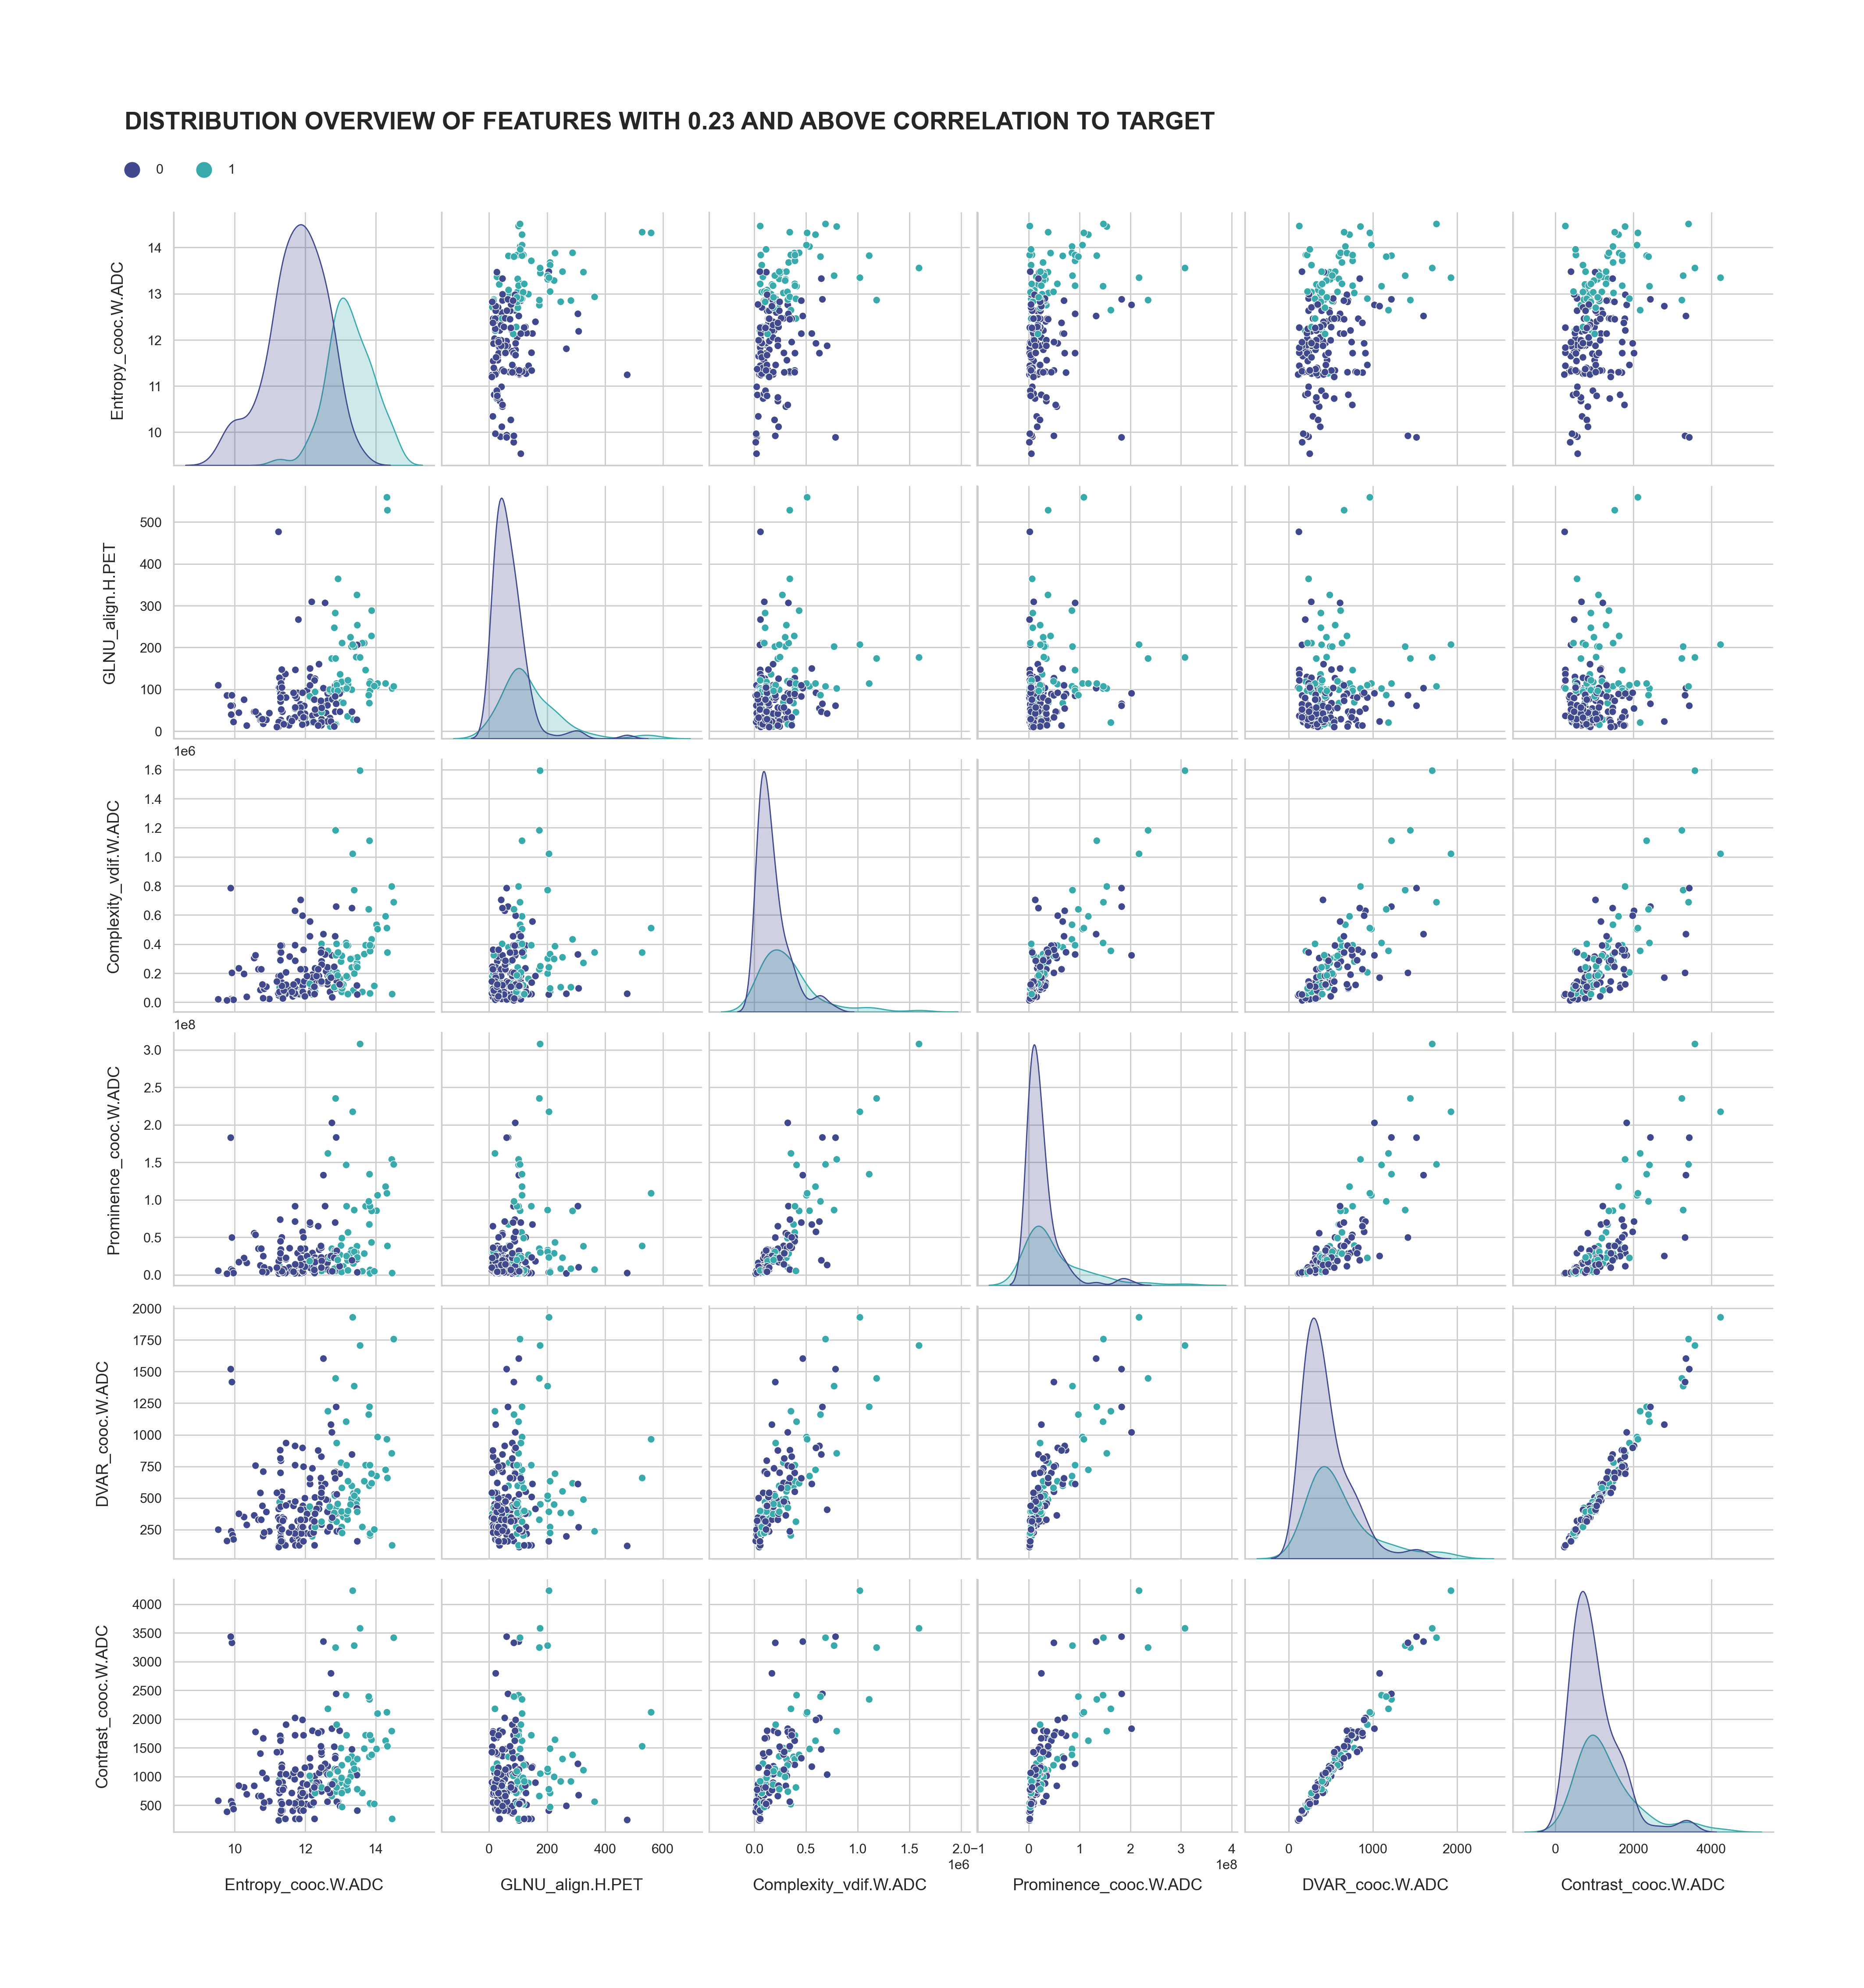

In [20]:
plot_pairplot(
    data = df[column_dist_overview_extract_by_corr], hue = 'Failure.binary',
    title = 'Distribution overview of features with 0.23 and above correlation to target'
);

### Feature correlation overview

In [192]:
column_corr_overview_extract_by_corr = list(
    df.corr()[['Failure.binary']]
    .rename(columns = {'Failure.binary': 'Correlation with target'})
    .query('`Correlation with target` > 0.2 | `Correlation with target` < -0.2')
    .index)

print(column_corr_overview_extract_by_corr)

['Entropy_cooc.W.ADC', 'GLNU_align.H.PET', 'DVAR_cooc.L.PET', 'Contrast_cooc.L.PET', 'IC1_d.H.PET', 'LZLGE.H.PET', 'Min_hist.ADC', 'Variance_hist.ADC', 'ratio_3ds_vol.ADC', 'IC1_.L.ADC', 'Strength_vdif_.L.ADC', 'IC1_d.H.ADC', 'Strength_vdif.H.ADC', 'Variance_cooc.W.ADC', 'DVAR_cooc.W.ADC', 'SVAR_cooc.W.ADC', 'Contrast_cooc.W.ADC', 'Tendency_cooc.W.ADC', 'Prominence_cooc.W.ADC', 'Complexity_vdif.W.ADC', 'GLVAR_align.W.ADC', 'GLVAR_area.W.ADC', 'Failure.binary']


In [193]:
def plot_heatmap(
    data, figsize = (16, 8), cmap = sns.color_palette(palette = palette_a1, as_cmap = True),
    linewidths: int = 1, annot: bool = True, fmt: str = ".1f",
    title: str = None

) -> sns.heatmap:

    title = ' ' if title is None else title

    sns.set(style = 'whitegrid', rc = {'figure.figsize': figsize})

    g = sns.heatmap(
        data = data, cmap = cmap, linewidths = linewidths, 
        annot = annot, fmt = fmt, annot_kws = dict(fontsize = 9.5, alpha = 0.8))

    g.set_xlabel(xlabel = "".join([(' '), ('\n'*3), (' ') ]))
    g.set_ylabel(ylabel = "".join([(' '), ('\n'*3), (' ') ]))

    g.set_title(
        label = "".join([(' '), ('\n'*4), (title), ('\n'*1)]).upper(),
        fontdict = dict(fontsize = 14, fontweight = 'bold'), loc = 'left')

    plt.text(
        s = ' ', x = 1.23, y = 1,
        transform = g.axes.transAxes, )

    return g

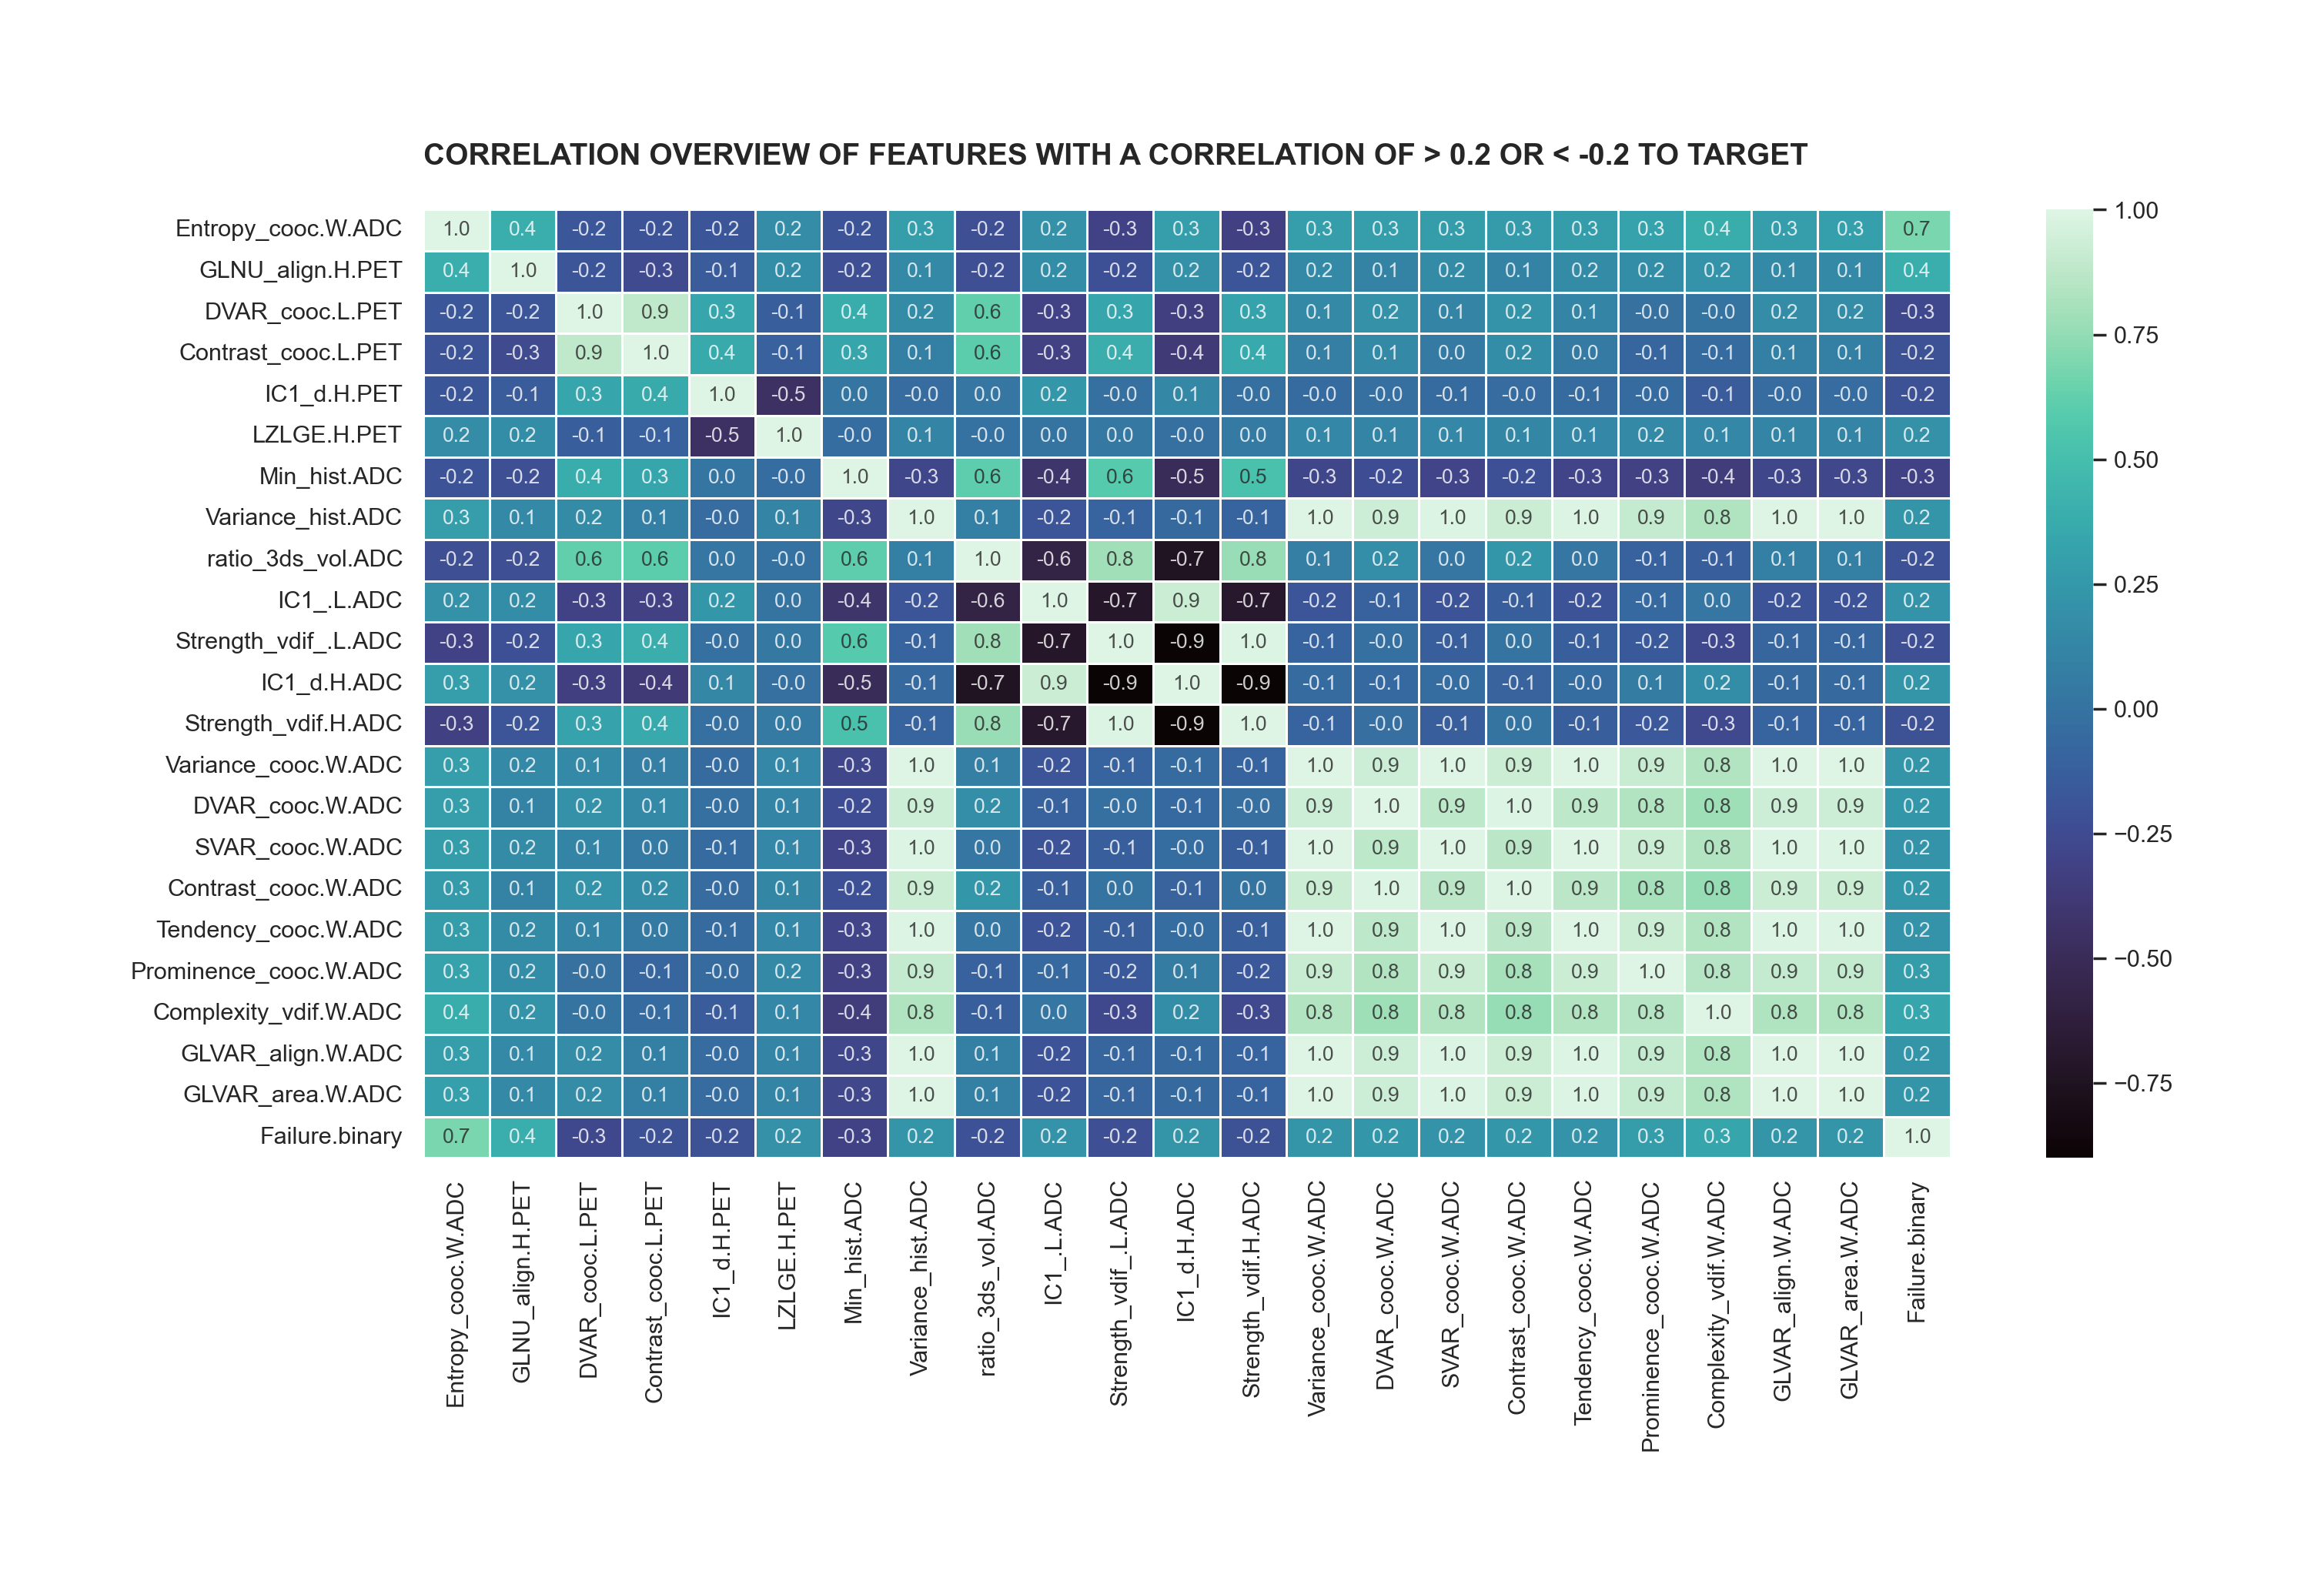

In [194]:
plot_heatmap(
    data = df[column_corr_overview_extract_by_corr].corr(),
    title = 'Correlation overview of features with a correlation of > 0.2 or < -0.2 to target'
);

From the plot, `Entropy_cooc.W.ADC` seems to be the most prominent out of all the features in explaining the target class outcome with a `correlation value of 0.7` as opposed to the other features which got a `correlation value of 0.4 and below`

## Feature scaling, dimensionality reduction, and feature extraction

It is a common practice to apply principal component analysis before executing clustering algorithms as it will help in finding latent features among the data, reduces dimensions, and therefore, decrease computational cost.

With the features being of different scale, it will be better to normalize rather than standardize. Thus, I will use MinMaxScaler()

In [195]:
def pipe_scale_dimensionreduction(method) -> Pipeline:
    return Pipeline(steps = [
        ('scale', MinMaxScaler()),
        ('method', method), ])

Specifying to retain 95% of the variance in the original data after applying PCA

In [196]:
method_pca = (
    pipe_scale_dimensionreduction(
        method = PCA(n_components = 0.95, random_state = 0))
    .fit(var_X))

Getting the number of components the algorithm has selected

In [197]:
method_pca_n_components = method_pca.steps[1][1].n_components_
method_pca_n_components

11

Transforming the variable X using PCA and assigning it to a dataframe

In [198]:
df_transformed = (
    pd.DataFrame(
        data = method_pca.transform(var_X),
        columns = [f'PC{x}' for x in range(1, method_pca_n_components + 1)], )
    .assign(**{'Failure.binary': var_y.to_numpy()}))

df_transformed.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.999969 -0.662641  0.210586 -0.585717  0.285236 -0.466644 -0.174265   
1 -1.966676 -0.227635  0.745383 -0.499318 -0.696014 -0.355153  0.389122   
2 -1.943384 -1.076428 -0.625807  0.413053  0.448163 -0.471302 -1.061687   
3 -2.022240 -0.109832  0.567861  0.921422  0.146706 -0.052499  0.213032   
4 -2.228796 -1.305999 -0.983146  0.678336 -0.049996 -0.026673  0.358001   

        PC8       PC9      PC10      PC11  Failure.binary  
0 -0.204481  0.074304 -0.042223 -0.309827               0  
1  0.128643 -0.041175 -0.128747  0.113712               1  
2 -0.031165 -0.046357 -0.159227 -0.242236               0  
3 -0.350346 -0.214044 -0.213044 -0.137190               1  
4  0.303194  0.429558  0.473278  0.209292               0

In [199]:
df_transformed.describe()

PC1         PC2           PC3           PC4           PC5  \
count  1.970000e+02  197.000000  1.970000e+02  1.970000e+02  1.970000e+02   
mean  -1.442726e-16    0.000000 -9.017040e-17 -5.410224e-17  5.635650e-17   
std    3.875903e+00    1.395630  1.101858e+00  9.883646e-01  6.834688e-01   
min   -3.516060e+00   -3.086733 -3.010406e+00 -3.331563e+00 -2.459694e+00   
25%   -2.230884e+00   -0.931490 -6.600262e-01 -6.433395e-01 -4.827580e-01   
50%   -1.960455e+00   -0.297432  5.839066e-02 -2.689091e-02  3.781587e-02   
75%    5.367085e+00    0.736635  7.453831e-01  5.561163e-01  3.918559e-01   
max    7.762937e+00    3.804354  3.588896e+00  3.361647e+00  2.555962e+00   

                PC6           PC7           PC8           PC9          PC10  \
count  1.970000e+02  1.970000e+02  1.970000e+02  1.970000e+02  1.970000e+02   
mean  -6.988206e-17  4.508520e-18 -1.352556e-17  4.508520e-18 -8.453475e-18   
std    6.450541e-01  5.914718e-01  4.895602e-01  4.812307e-01  3.868255e-01   
min   -2.227148e+00 -1.296917e+00 -1.212472e+00 -1.321106e+00 -8.453350e-01   
25%   -3.303239e-01 -4.035737e-01 -2.903467e-01 -2.040759e-01 -2.714878e-01   
50%    1.894101e-02 -2.999805e-02 -8.642730e-02  3.540982e-02 -4.359250e-02   
75%    3.485577e-01  2.839140e-01  1.970778e-01  2.385197e-01  2.469965e-01   
max    2.367281e+00  2.361818e+00  2.126416e+00  1.861162e+00  1.342040e+00   

               PC11  Failure.binary  
count  1.970000e+02      197.000000  
mean  -3.465925e-17        0.340102  
std    3.601993e-01        0.474950  
min   -1.073466e+00        0.000000  
25%   -2.354584e-01        0.000000  
50%   -2.517608e-02        0.000000  
75%    2.092923e-01        1.000000  
max    1.307724e+00        1.000000

Getting the PCA explained variance

In [200]:
method_pca_explainedvariances = method_pca.steps[1][1].explained_variance_ratio_
print(method_pca_explainedvariances)

[0.67558736 0.08759435 0.05459928 0.0439309  0.02100744 0.01871234
 0.01573272 0.01077824 0.01041459 0.00672924 0.00583474]


### Visualizing the explained variances by principal components

In [201]:
def plot_lineplot(
    data, x, y, hue = None, figsize: tuple = (15, 4), 
    x_label: str = None, y_label: str = None, err_style: str = None, 
    title: str = None, subtitle: str = None, style: str = None,
    legend_ncol: int = 5,
) -> sns.lineplot:

    color = color_a1 if hue is None else None
    palette = palette_a1 if hue is not None else None
    title = ' ' if title is None else title
    subtitle = ' ' if subtitle is None else ' ' if hue is not None else subtitle

    sns.set(style = 'whitegrid', rc = {'figure.figsize': figsize})

    g = sns.lineplot(
        data = data, x = x, y = y, hue = hue, palette = palette, 
        color = color, marker = 'o',err_style = err_style, style = style,
        err_kws = dict(alpha = 0.08))

    g.set_xlabel("".join([('\n'*1), (g.get_xlabel() if x_label is None else x_label), ('\n'*3)]))
    g.set_ylabel("".join([('\n'*3), (g.get_ylabel() if y_label is None else y_label), ('\n'*1)]))

    g.set_title(
        label = "".join([('\n'*3), (title), ('\n'*1)]).upper(), loc = 'left',
        fontdict = dict(fontsize = 14, fontweight = 'bold'),
        y = 1.08, )

    plt.text(
        s = subtitle, x = 0, y = 1.08,
        alpha = 0.5, horizontalalignment = 'left',
        transform = g.axes.transAxes,
        fontdict = dict(fontsize = 11),)

    plt.text(
        s = ' ', x = 1.08, y = 1,
        transform = g.axes.transAxes,)
        
    if hue is not None:
        sns.move_legend(
            obj = g, loc = 'lower left', bbox_to_anchor = (-0.01, 1), 
            ncol = legend_ncol, title = None, frameon = False,
            markerscale = 2, )

    sns.despine()

    return g

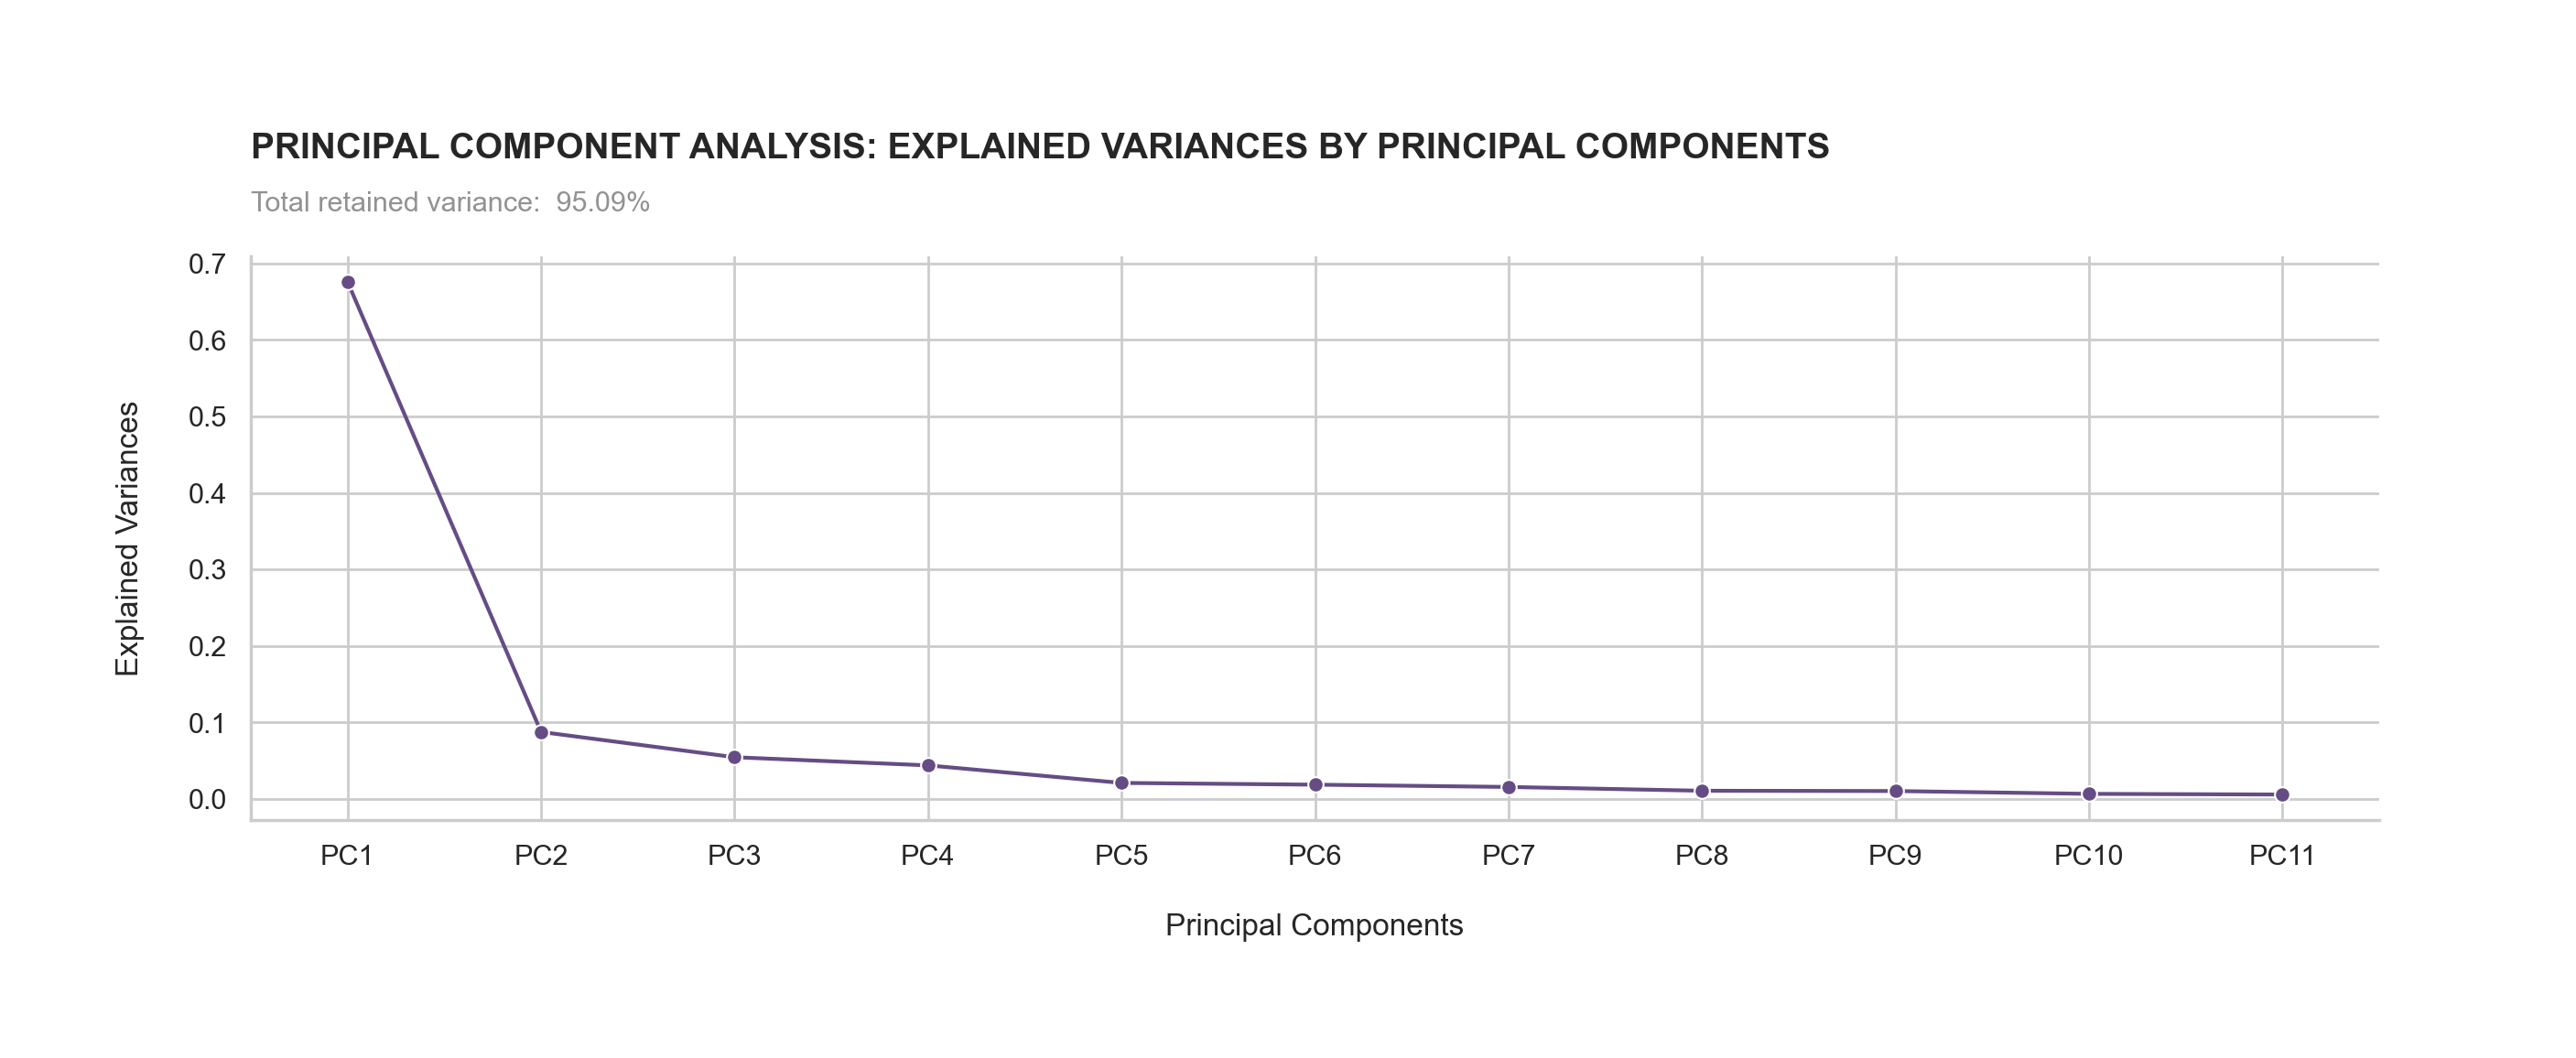

In [202]:
plot_lineplot(
    data = pd.DataFrame(dict(
        principal_components = [f'PC{x}' for x in range(1, method_pca_n_components + 1)],
        explained_variances = method_pca_explainedvariances, )),
    x = 'principal_components', y = 'explained_variances', 
    x_label = 'Principal Components', y_label = 'Explained Variances',
    title = 'Principal component analysis: Explained variances by principal components',
    subtitle = f'Total retained variance: {np.sum(method_pca_explainedvariances): .2%}'
);

## Workflow handling

Making a class to handle the same workflow of the classification models to save up processing time when computing the later on ROC AUC curve.

Using GridSearchCV for hyperparameter tuning with StratifiedKfold as the cross validator: N-fold cross validator with 10 as the default

In [203]:
class ProcessModel():
    def __init__(
        self, dataframe: pd.DataFrame, model, 
        model_name: str, model_param_grid: dict = {}
        ) -> None:

        self.model_name = model_name
        self.dataframe = dataframe
        self.gscv = GridSearchCV(estimator = model, param_grid = model_param_grid)
        self.fit_model()
    

    def __set_primary_variables(self, target_colname: str = None) -> None:
        # Assign the target column as the last column if nothing is provided in the `target_colname` parameter
        self.target_colname = self.dataframe.columns[-1] if target_colname is None else target_colname

        # Assigning the primary variables
        self.var_X = self.dataframe.iloc[:, :-1]
        self.var_y = self.dataframe.iloc[:, -1]

    def get_X(self) -> Union[pd.DataFrame, pd.Series]:
        return self.var_X

    def get_y(self) -> Union[pd.DataFrame, pd.Series]:
        return self.var_y
        

    def __split_dataset(self) -> None:
        # Splitting the data to training and testing set and use cross validation in lieu to using validation set
        self.var_X_train, self.var_X_test, self.var_y_train, self.var_y_test = (
            train_test_split(self.var_X, self.var_y, stratify = self.var_y, random_state = 0,) )

    def get_splitted_data(self) -> dict:
        splitted_data = dict(
            X_train = self.var_X_train, X_test = self.var_X_test,
            y_train = self.var_y_train, y_test = self.var_y_test, )

        return splitted_data


    def _set_crossvalidator(self, cross_validator = None, cv_nsplits: int = 10) -> None:
        # N-fold cross validation with 10 as default and grid search through the parameter grid
        self.cross_validator = StratifiedKFold(n_splits = cv_nsplits) if cross_validator is None else cross_validator
        self.gscv.set_params(cv = self.cross_validator)

    def _get_crossvalidator(self) -> 'cross_validator':
        return self.cross_validator


    def get_predictions(self) -> dict:
        # Predicted y values
        predictions = dict(
            y_train = self.gscv.predict(self.var_X_train), 
            y_test = self.gscv.predict(self.var_X_test), )

        return predictions

    def get_confusion_matrices(self) -> dict:
        # Getting the train and test confusion matrix
        predictions = self.get_predictions()
        confusion_martrices = dict(
            train = confusion_matrix(y_true = self.var_y_train, y_pred = predictions['y_train']),
            test = confusion_matrix(y_true = self.var_y_test, y_pred = predictions['y_test']), )

        return confusion_martrices

    def get_subsets_by_confusion_matrix_dataframe(self) -> pd.DataFrame:
        # Make a dataframe out of the confusion matrix of the subsets
        confusion_matrices = self.get_confusion_matrices()
        processed_dataframe = pd.DataFrame(dict(
            element = ['True Negative', 'False Positive', 'False Negative', 'True Positive'] * 2,
            value = list(confusion_matrices['train'].ravel()) + list(confusion_matrices['test'].ravel()),
            set = ('Train ' * 4).split() + ('Test ' * 4).split(), ))

        return processed_dataframe

    def get_accuracy_scores(self) -> dict:
        # Evaluate train and test
        accuracy_scores = dict(
            train = self.gscv.score(X = self.var_X_train, y = self.var_y_train),
            test = self.gscv.score(X = self.var_X_test, y = self.var_y_test), )
        
        return accuracy_scores
        
    def get_classification_reports(self) -> dict:
        # Summarize classification result
        predictions = self.get_predictions()
        classification_reports = dict(
            train = classification_report(y_true = self.var_y_train, y_pred = predictions['y_train']),
            test = classification_report(y_true = self.var_y_test, y_pred = predictions['y_test']))

        return classification_reports

    def get_roc_curve(self) -> dict:
        # Getting roc curve of the test set
        if hasattr(self.gscv, "decision_function"):
            receiver_operating_characteristic = dict(zip(
                ['fpr', 'tpr', 'thresholds'], 
                roc_curve(y_true = self.var_y_test, y_score = self.gscv.decision_function(self.var_X_test)), ))
        else:
            receiver_operating_characteristic = dict(zip(
                ['fpr', 'tpr', 'thresholds'], 
                roc_curve(y_true = self.var_y_test, y_score = self.gscv.predict_proba(self.var_X_test)[:, 1]), ))            

        return receiver_operating_characteristic

    def get_auc(self) -> float:
        # Get auc
        receiver_operating_characteristic_curve = self.get_roc_curve()
        area_under_curve = auc(
            x = receiver_operating_characteristic_curve['fpr'], 
            y = receiver_operating_characteristic_curve['tpr'])

        return area_under_curve 

    def get_model_name(self) -> str:
        return self.model_name

    def get(self) -> GridSearchCV:
        # Get gridsearch instance
        return self.gscv

        
    def fit_model(self) -> None:
        self.__set_primary_variables()
        self.__split_dataset()
        self._set_crossvalidator()
        # Training the model
        self.gscv.fit(X = self.var_X_train, y = self.var_y_train)

Visualize model evaluation

In [204]:
def visualize_model_evaluation(
    dataframe: pd.DataFrame, train_score: np.float64, test_score: np.float64, 
    classification_report_train: str, classification_report_test: str,
    palette = None, height: int = 3, aspect: int = 4, sharex: bool = False,
    title_model: str = None,
) -> sns.FacetGrid:

    palette = palette_a1 if palette is None else palette
    title_model = ' ' if title_model is None else title_model

    sns.set(style = 'whitegrid')

    g = sns.FacetGrid(
        data = dataframe, row = 'set', height = height, 
        aspect = aspect, sharex = sharex, )

    g.map_dataframe(
        func = sns.barplot, x = 'value', y = 'element', 
        palette = palette)

    g.fig.suptitle(
        "".join([(' '), ('\n'*3), ('Model: '), (title_model), ('\n'*1)]).upper(),
        fontweight = 'bold', y = 1.6, horizontalalignment = 'left', x = 0, transform = g.axes[0,0].transAxes)

    plt.text(
        s = "Model evaluation on the given dataset", x = 0, y = 1.05,
        alpha = 0.5, transform = g.axes[0,0].transAxes)

    plt.text(
        s = classification_report_train.upper(), x = 1.1, y = 0,
        alpha = 0.8, transform = g.axes[0,0].transAxes,
        fontdict = dict(fontfamily = 'monospace'))

    plt.text(
        s = classification_report_test.upper(), x = 1.1, y = 0,
        alpha = 0.8, transform = g.axes[1,0].transAxes,
        fontdict = dict(fontfamily = 'monospace'))        

    g.set_titles(row_template = '{row_name} Set',)
        
    for axes in g.axes:
        for axis in axes:
            axis.bar_label(axis.containers[0], padding = 10)
            axis.set_ylabel("".join([(' '), ('\n'*3)]))
            axis.set_xlabel(
                xlabel = (
                    "".join([(' '), ('\n'*1), (axis.get_title()), (': '), 
                    ('Accuracy Score = '), (f'{train_score: .3f}' if axis == g.axes[0,0] else f'{test_score: .3f}'), 
                    ('\n'*3)])),
                fontdict = dict(fontsize = 13, fontweight = 'medium'), 
                loc = 'left')
            axis.set_title(' ')

    plt.text(
        s = ' ', x = 1.7, y = 1,
        transform = g.axes[0,0].transAxes)

    plt.subplots_adjust(hspace = 0.5)

    sns.despine()

    return g

## Execution

In [205]:
def evaluate_model(processed_model: ProcessModel) -> sns.FacetGrid:
    dataframe = processed_model.get_subsets_by_confusion_matrix_dataframe()
    classification_reports = processed_model.get_classification_reports()
    accuracy_scores = processed_model.get_accuracy_scores()
    title_model = processed_model.get_model_name()

    return visualize_model_evaluation(
        dataframe = dataframe, title_model = title_model,
        train_score = accuracy_scores['train'], test_score = accuracy_scores['test'],
        classification_report_train = classification_reports['train'],
        classification_report_test = classification_reports['test'], );

### Logistic regression

In [206]:
model_logreg = ProcessModel(
    dataframe = df_transformed, model = LogisticRegression(max_iter = 5000),
    model_name = "Logistic Regression",
    model_param_grid = {
        'C': np.linspace(0.01, 100, num = 50),
        'penalty': ['none', 'l1', 'l2', 'elasticnet'],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}, )

Grid search and cross validation result

In [207]:
pd.DataFrame(model_logreg.get().cv_results_).sort_values(by = 'rank_test_score').head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time   param_C  \
33       0.006496      0.000875         0.002558        0.000296  2.050612   
30       0.014095      0.001327         0.002350        0.000575  2.050612   
31       0.012932      0.001140         0.002911        0.000449  2.050612   
34       0.008778      0.000762         0.002644        0.000609  2.050612   
27       0.003686      0.000786         0.002455        0.000428  2.050612   

   param_penalty param_solver  \
33            l2          sag   
30            l2    newton-cg   
31            l2        lbfgs   
34            l2         saga   
27            l1    liblinear   

                                               params  split0_test_score  \
33  {'C': 2.050612244897959, 'penalty': 'l2', 'sol...                0.8   
30  {'C': 2.050612244897959, 'penalty': 'l2', 'sol...                0.8   
31  {'C': 2.050612244897959, 'penalty': 'l2', 'sol...                0.8   
34  {'C': 2.050612244897959, 'penalty': 'l2', 'sol...                0.8   
27  {'C': 2.050612244897959, 'penalty': 'l1', 'sol...                0.8   

    split1_test_score  ...  split3_test_score  split4_test_score  \
33           0.733333  ...                0.8                0.8   
30           0.733333  ...                0.8                0.8   
31           0.733333  ...                0.8                0.8   
34           0.733333  ...                0.8                0.8   
27           0.733333  ...                0.8                0.8   

    split5_test_score  split6_test_score  split7_test_score  \
33           0.933333           0.733333           0.785714   
30           0.933333           0.733333           0.785714   
31           0.933333           0.733333           0.785714   
34           0.933333           0.733333           0.785714   
27           0.866667           0.733333           0.785714   

    split8_test_score  split9_test_score  mean_test_score  std_test_score  \
33           0.857143           0.642857         0.801905        0.085189   
30           0.857143           0.642857         0.801905        0.085189   
31           0.857143           0.642857         0.801905        0.085189   
34           0.857143           0.642857         0.801905        0.085189   
27           0.857143           0.642857         0.795238        0.076842   

    rank_test_score  
33                1  
30                1  
31                1  
34                1  
27                5  

[5 rows x 21 columns]

Model best parameters by grid search

In [208]:
model_logreg.get().best_params_

{'C': 2.050612244897959, 'penalty': 'l2', 'solver': 'newton-cg'}

Model evaluation: Visualized

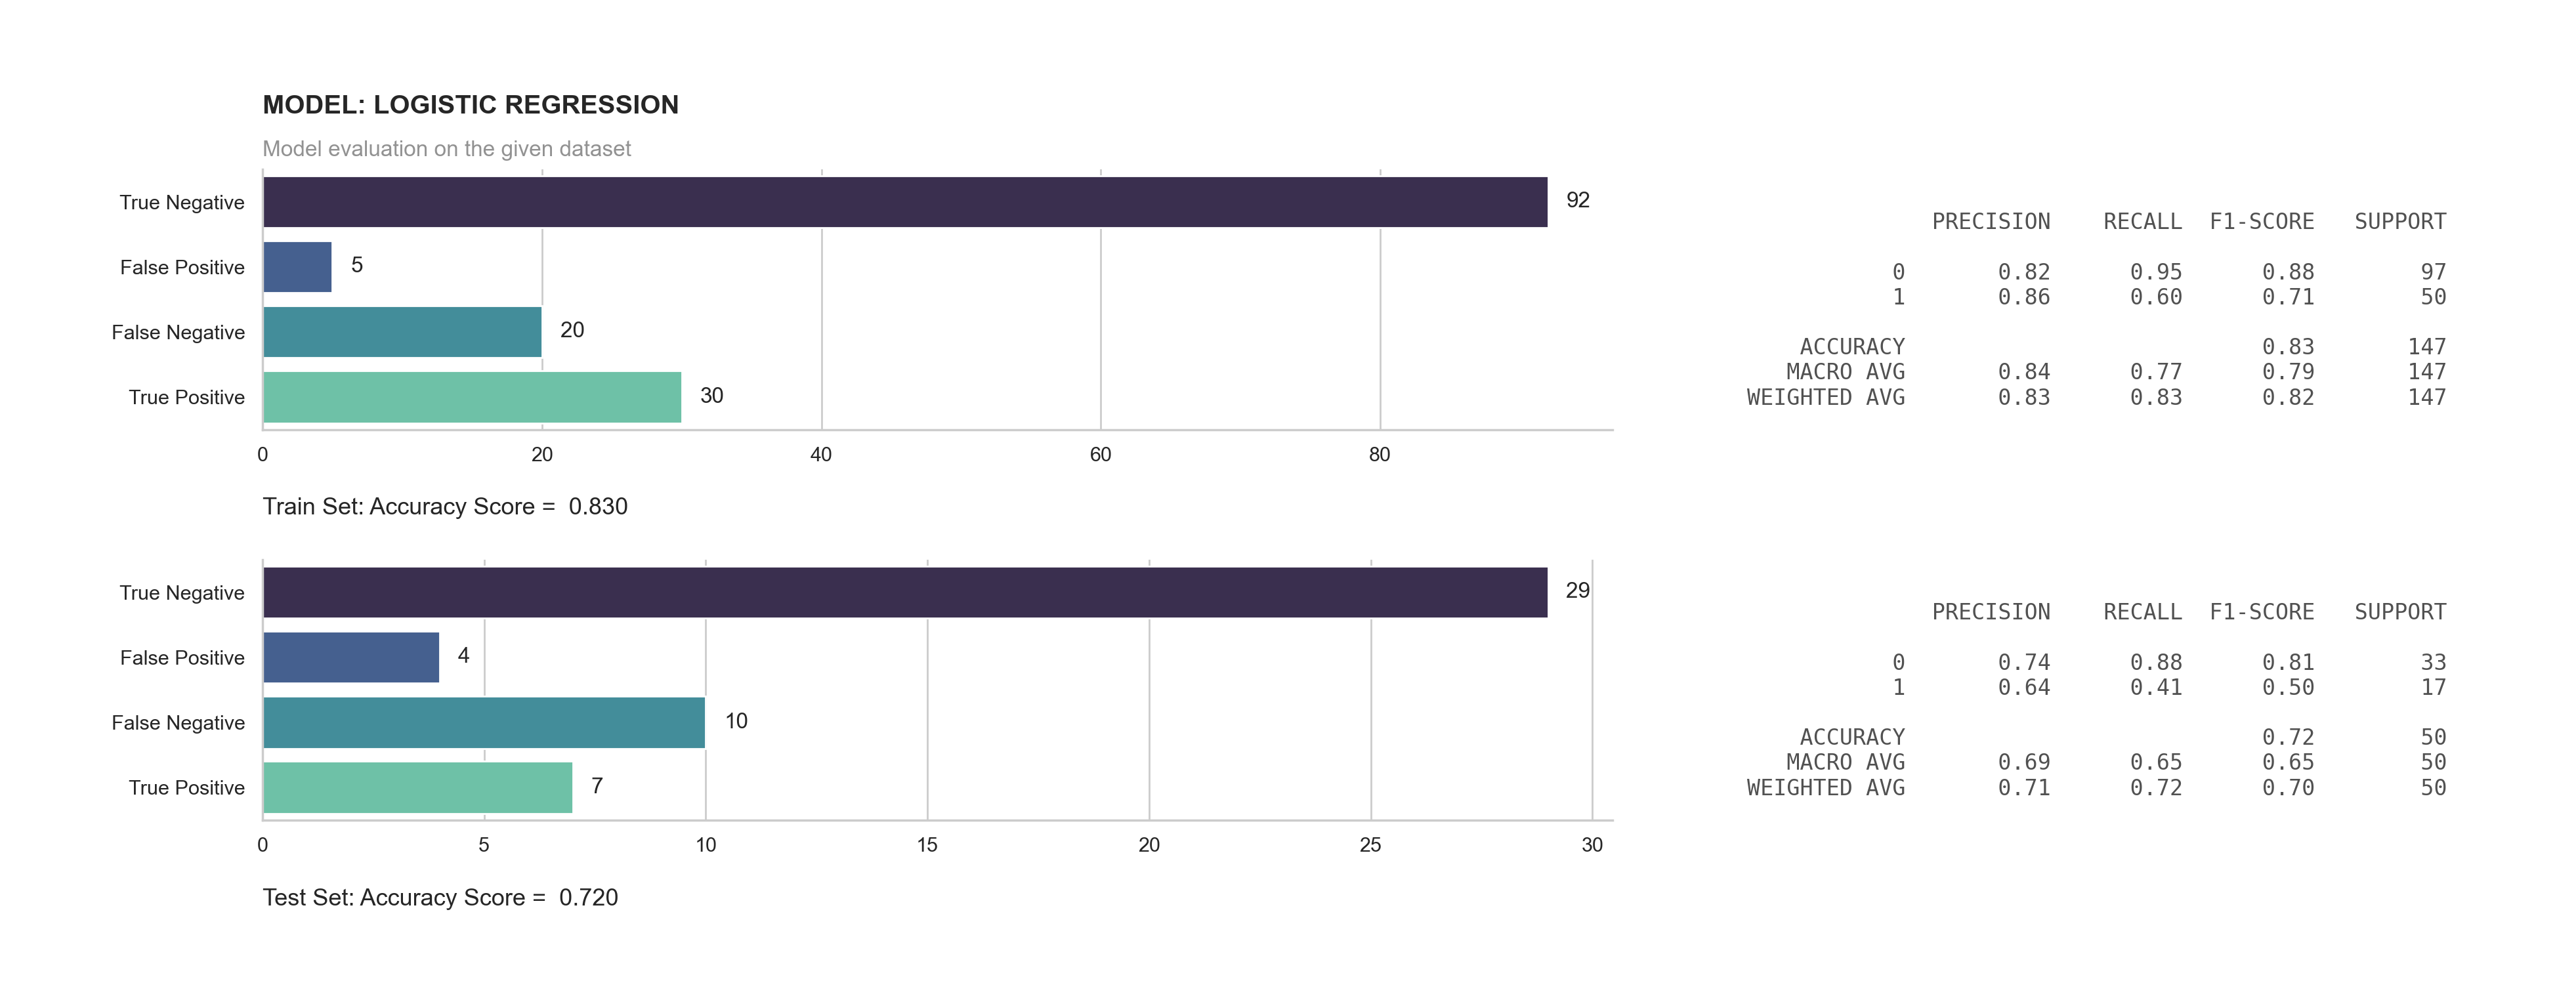

In [209]:
evaluate_model(model_logreg)

### K-nearest neighbors

In [210]:
model_knn = ProcessModel(
    dataframe = df_transformed, model = KNeighborsClassifier(),
    model_name = "K-Nearest Neighbors",
    model_param_grid = {
        'n_neighbors': range(3, 25),
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev']}, )

Grid search and cross validation result

In [211]:
pd.DataFrame(model_knn.get().cv_results_).sort_values(by = 'rank_test_score').head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
271       0.003294      0.000437         0.003647        0.000576   
95        0.003065      0.000389         0.003718        0.000857   
623       0.005213      0.001086         0.004970        0.000695   
447       0.003401      0.000378         0.004017        0.000672   
662       0.004962      0.001235         0.005419        0.001320   

    param_algorithm param_metric param_n_neighbors param_weights  \
271       ball_tree    manhattan                 6      distance   
95             auto    manhattan                 6      distance   
623           brute    manhattan                 6      distance   
447         kd_tree    manhattan                 6      distance   
662           brute    chebyshev                 4       uniform   

                                                params  split0_test_score  \
271  {'algorithm': 'ball_tree', 'metric': 'manhatta...                0.8   
95   {'algorithm': 'auto', 'metric': 'manhattan', '...                0.8   
623  {'algorithm': 'brute', 'metric': 'manhattan', ...                0.8   
447  {'algorithm': 'kd_tree', 'metric': 'manhattan'...                0.8   
662  {'algorithm': 'brute', 'metric': 'chebyshev', ...                0.8   

     ...  split3_test_score  split4_test_score  split5_test_score  \
271  ...           0.733333           0.733333           0.933333   
95   ...           0.733333           0.733333           0.933333   
623  ...           0.733333           0.733333           0.933333   
447  ...           0.733333           0.733333           0.933333   
662  ...           0.800000           0.733333           0.800000   

     split6_test_score  split7_test_score  split8_test_score  \
271           0.666667           0.785714           0.785714   
95            0.666667           0.785714           0.785714   
623           0.666667           0.785714           0.785714   
447           0.666667           0.785714           0.785714   
662           0.733333           0.714286           0.642857   

     split9_test_score  mean_test_score  std_test_score  rank_test_score  
271           0.714286         0.768571        0.080339                1  
95            0.714286         0.768571        0.080339                1  
623           0.714286         0.768571        0.080339                1  
447           0.714286         0.768571        0.080339                1  
662           0.642857         0.753333        0.081282                5  

[5 rows x 22 columns]

Model best parameters by grid search

In [212]:
model_knn.get().best_params_

{'algorithm': 'auto',
 'metric': 'manhattan',
 'n_neighbors': 6,
 'weights': 'distance'}

Model evaluation: Visualized

In [213]:
evaluate_model(model_knn)

### Support vector machine

In [214]:
model_svc = ProcessModel(
    dataframe = df_transformed, model = SVC(max_iter = 5000, random_state = 0),
    model_name = "Support Vector Classifier",
    model_param_grid = {
        'C': np.linspace(0.01, 50, 50),
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'degree': range(3, 7), 'gamma': ['scale', 'auto']}, )

Grid search and cross validation result

In [215]:
pd.DataFrame(model_svc.get().cv_results_).sort_values(by = 'rank_test_score').head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time   param_C  \
98        0.005873      0.001106         0.003280        0.000855  3.070612   
106       0.004595      0.000360         0.002955        0.000774  3.070612   
114       0.005251      0.001082         0.002443        0.000363  3.070612   
122       0.005394      0.000669         0.002979        0.000565  3.070612   
186       0.005594      0.000767         0.002814        0.000496   5.11102   

    param_degree param_gamma param_kernel  \
98             3       scale          rbf   
106            4       scale          rbf   
114            5       scale          rbf   
122            6       scale          rbf   
186            6       scale          rbf   

                                                params  split0_test_score  \
98   {'C': 3.0706122448979594, 'degree': 3, 'gamma'...                0.8   
106  {'C': 3.0706122448979594, 'degree': 4, 'gamma'...                0.8   
114  {'C': 3.0706122448979594, 'degree': 5, 'gamma'...                0.8   
122  {'C': 3.0706122448979594, 'degree': 6, 'gamma'...                0.8   
186  {'C': 5.111020408163266, 'degree': 6, 'gamma':...                0.8   

     ...  split3_test_score  split4_test_score  split5_test_score  \
98   ...           0.733333           0.800000           0.933333   
106  ...           0.733333           0.800000           0.933333   
114  ...           0.733333           0.800000           0.933333   
122  ...           0.733333           0.800000           0.933333   
186  ...           0.733333           0.866667           0.933333   

     split6_test_score  split7_test_score  split8_test_score  \
98            0.733333           0.785714           0.857143   
106           0.733333           0.785714           0.857143   
114           0.733333           0.785714           0.857143   
122           0.733333           0.785714           0.857143   
186           0.800000           0.714286           0.857143   

     split9_test_score  mean_test_score  std_test_score  rank_test_score  
98            0.714286         0.809048        0.090060                1  
106           0.714286         0.809048        0.090060                1  
114           0.714286         0.809048        0.090060                1  
122           0.714286         0.809048        0.090060                1  
186           0.642857         0.794762        0.084016                5  

[5 rows x 22 columns]

Model best parameters by grid search

In [216]:
model_svc.get().best_params_

{'C': 3.0706122448979594, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}

Model evaluation: Visualized

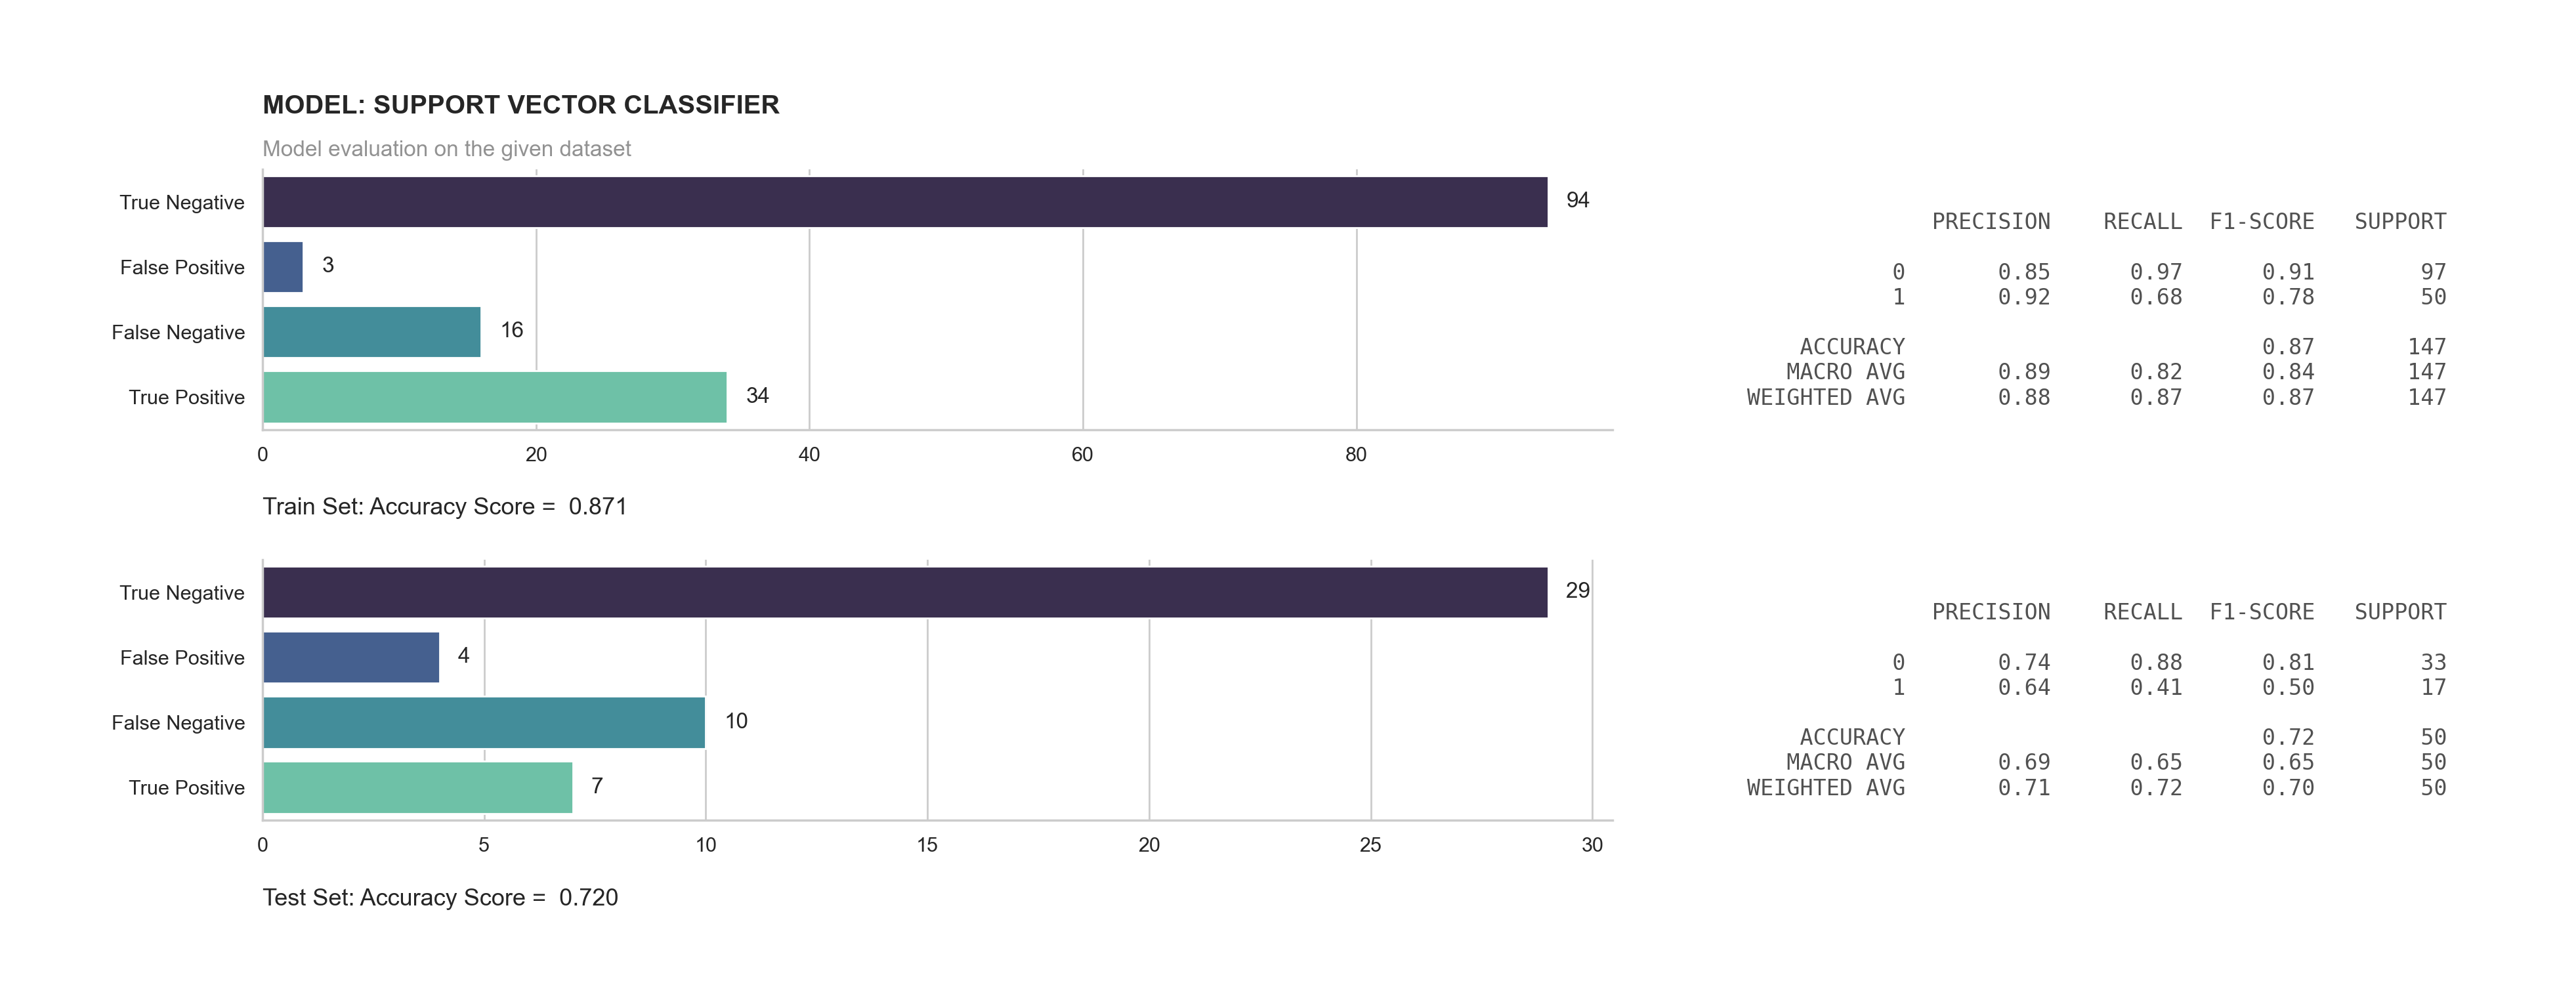

In [217]:
evaluate_model(model_svc)

### Random Forest Classifier

In [218]:
model_rfc = ProcessModel(
    dataframe = df_transformed, model = RandomForestClassifier(),
    model_name = "Random Forest Classifier",
    model_param_grid = {
        'bootstrap': [True, False],
        'max_depth': list(np.arange(0, 101, 10)) + [None],
        'max_features': ['auto', 'sqrt'],
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [2, 5, 10],
        'n_estimators': np.arange(10, 100, 15)}, )

Grid search and cross validation result

In [219]:
pd.DataFrame(model_rfc.get().cv_results_).sort_values(by = 'rank_test_score').head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
441        0.109441      0.003113         0.009728        0.001314   
2293       0.051826      0.001404         0.007464        0.001135   
2070       0.022671      0.001007         0.004405        0.000536   
569        0.163284      0.002472         0.012836        0.001111   
280        0.165139      0.001798         0.013227        0.001063   

     param_bootstrap param_max_depth param_max_features  \
441             True              40               auto   
2293           False              90               auto   
2070           False              70               auto   
569             True              50               auto   
280             True              20               sqrt   

     param_min_samples_leaf param_min_samples_split param_n_estimators  ...  \
441                       1                       5                 55  ...   
2293                      2                       5                 25  ...   
2070                      2                       2                 10  ...   
569                       2                       5                 85  ...   
280                       1                       5                 70  ...   

     split3_test_score  split4_test_score  split5_test_score  \
441           0.866667           0.866667           0.933333   
2293          0.800000           0.866667           0.933333   
2070          0.800000           0.800000           0.933333   
569           0.866667           0.866667           0.866667   
280           0.866667           0.800000           0.933333   

      split6_test_score  split7_test_score  split8_test_score  \
441            0.733333           0.857143           0.857143   
2293           0.666667           0.785714           0.928571   
2070           0.866667           0.785714           0.857143   
569            0.733333           0.785714           0.857143   
280            0.733333           0.785714           0.857143   

      split9_test_score  mean_test_score  std_test_score  rank_test_score  
441            0.714286         0.836190        0.087370                1  
2293           0.714286         0.829524        0.102105                2  
2070           0.714286         0.829048        0.065099                3  
569            0.714286         0.829048        0.083094                3  
280            0.714286         0.829048        0.088280                3  

[5 rows x 24 columns]

Model best parameters by grid search

In [220]:
model_rfc.get().best_params_

{'bootstrap': True,
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 55}

Model evaluation: Visualized

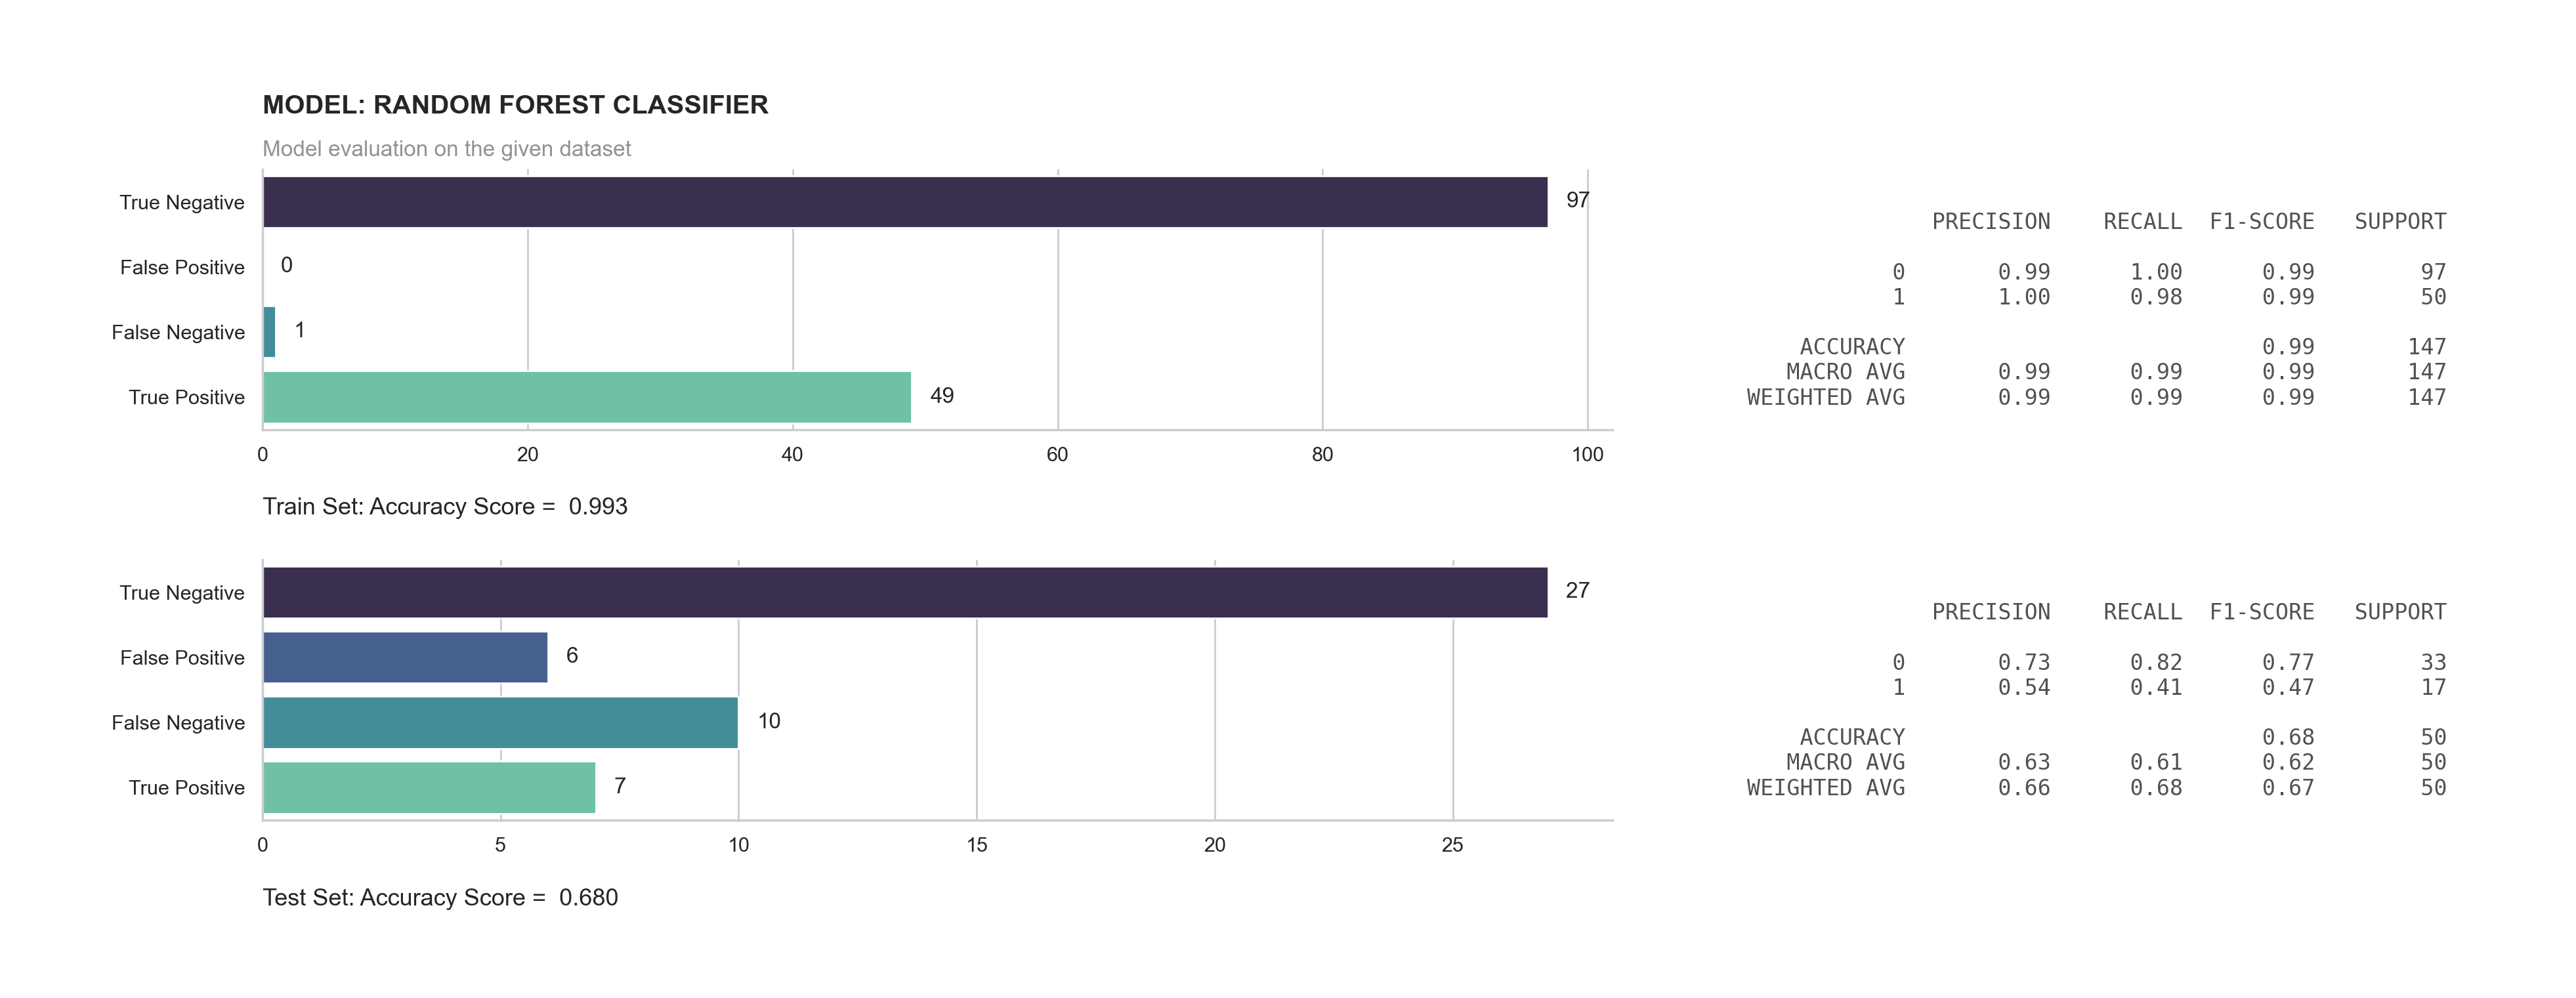

In [221]:
evaluate_model(model_rfc)

### Extreme gradient boosting

In [222]:
model_xgboost = ProcessModel(
    dataframe = df_transformed, model = XGBClassifier(verbosity = 0),
    model_name = "Extreme Gradient Boosting",
    model_param_grid = {
        'learning_rate': np.arange(0.05, 0.35, 0.05),
        'max_depth': np.arange(3, 16),
        'min_child_weight': np.arange(1, 8, 2),
        'gamma': np.arange(0, 0.5, 0.1),
        'colsample_bytree': np.arange(0.3, 0.8, 0.1)}, )

Grid search and cross validation result

In [223]:
pd.DataFrame(model_xgboost.get().cv_results_).sort_values(by = 'rank_test_score').head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
1560       0.177718      0.110570         0.009497        0.003545   
2184       0.478101      0.261755         0.017851        0.005470   
1872       0.241102      0.184433         0.013217        0.006992   
2808       0.184585      0.131049         0.016801        0.009318   
4060       0.069630      0.006532         0.005894        0.000238   

     param_colsample_bytree param_gamma param_learning_rate param_max_depth  \
1560                    0.4         0.0                0.05               3   
2184                    0.4         0.2                0.05               3   
1872                    0.4         0.1                0.05               3   
2808                    0.4         0.4                0.05               3   
4060                    0.5         0.3                0.05               4   

     param_min_child_weight  \
1560                      1   
2184                      1   
1872                      1   
2808                      1   
4060                      1   

                                                 params  ...  \
1560  {'colsample_bytree': 0.4, 'gamma': 0.0, 'learn...  ...   
2184  {'colsample_bytree': 0.4, 'gamma': 0.2, 'learn...  ...   
1872  {'colsample_bytree': 0.4, 'gamma': 0.1, 'learn...  ...   
2808  {'colsample_bytree': 0.4, 'gamma': 0.4, 'learn...  ...   
4060  {'colsample_bytree': 0.5, 'gamma': 0.300000000...  ...   

      split3_test_score  split4_test_score  split5_test_score  \
1560           0.866667           0.866667           0.933333   
2184           0.866667           0.866667           0.933333   
1872           0.866667           0.866667           0.933333   
2808           0.866667           0.866667           0.933333   
4060           0.800000           0.866667           0.933333   

      split6_test_score  split7_test_score  split8_test_score  \
1560           0.733333           0.785714           0.857143   
2184           0.733333           0.785714           0.857143   
1872           0.733333           0.785714           0.857143   
2808           0.733333           0.785714           0.857143   
4060           0.733333           0.785714           0.857143   

      split9_test_score  mean_test_score  std_test_score  rank_test_score  
1560           0.642857         0.828571        0.100000                1  
2184           0.642857         0.821905        0.099459                2  
1872           0.642857         0.821905        0.099459                2  
2808           0.642857         0.821905        0.108027                2  
4060           0.642857         0.821905        0.099459                2  

[5 rows x 23 columns]

Model best parameters by grid search

In [224]:
model_xgboost.get().best_params_

{'colsample_bytree': 0.4,
 'gamma': 0.0,
 'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_weight': 1}

Model evaluation: Visualized

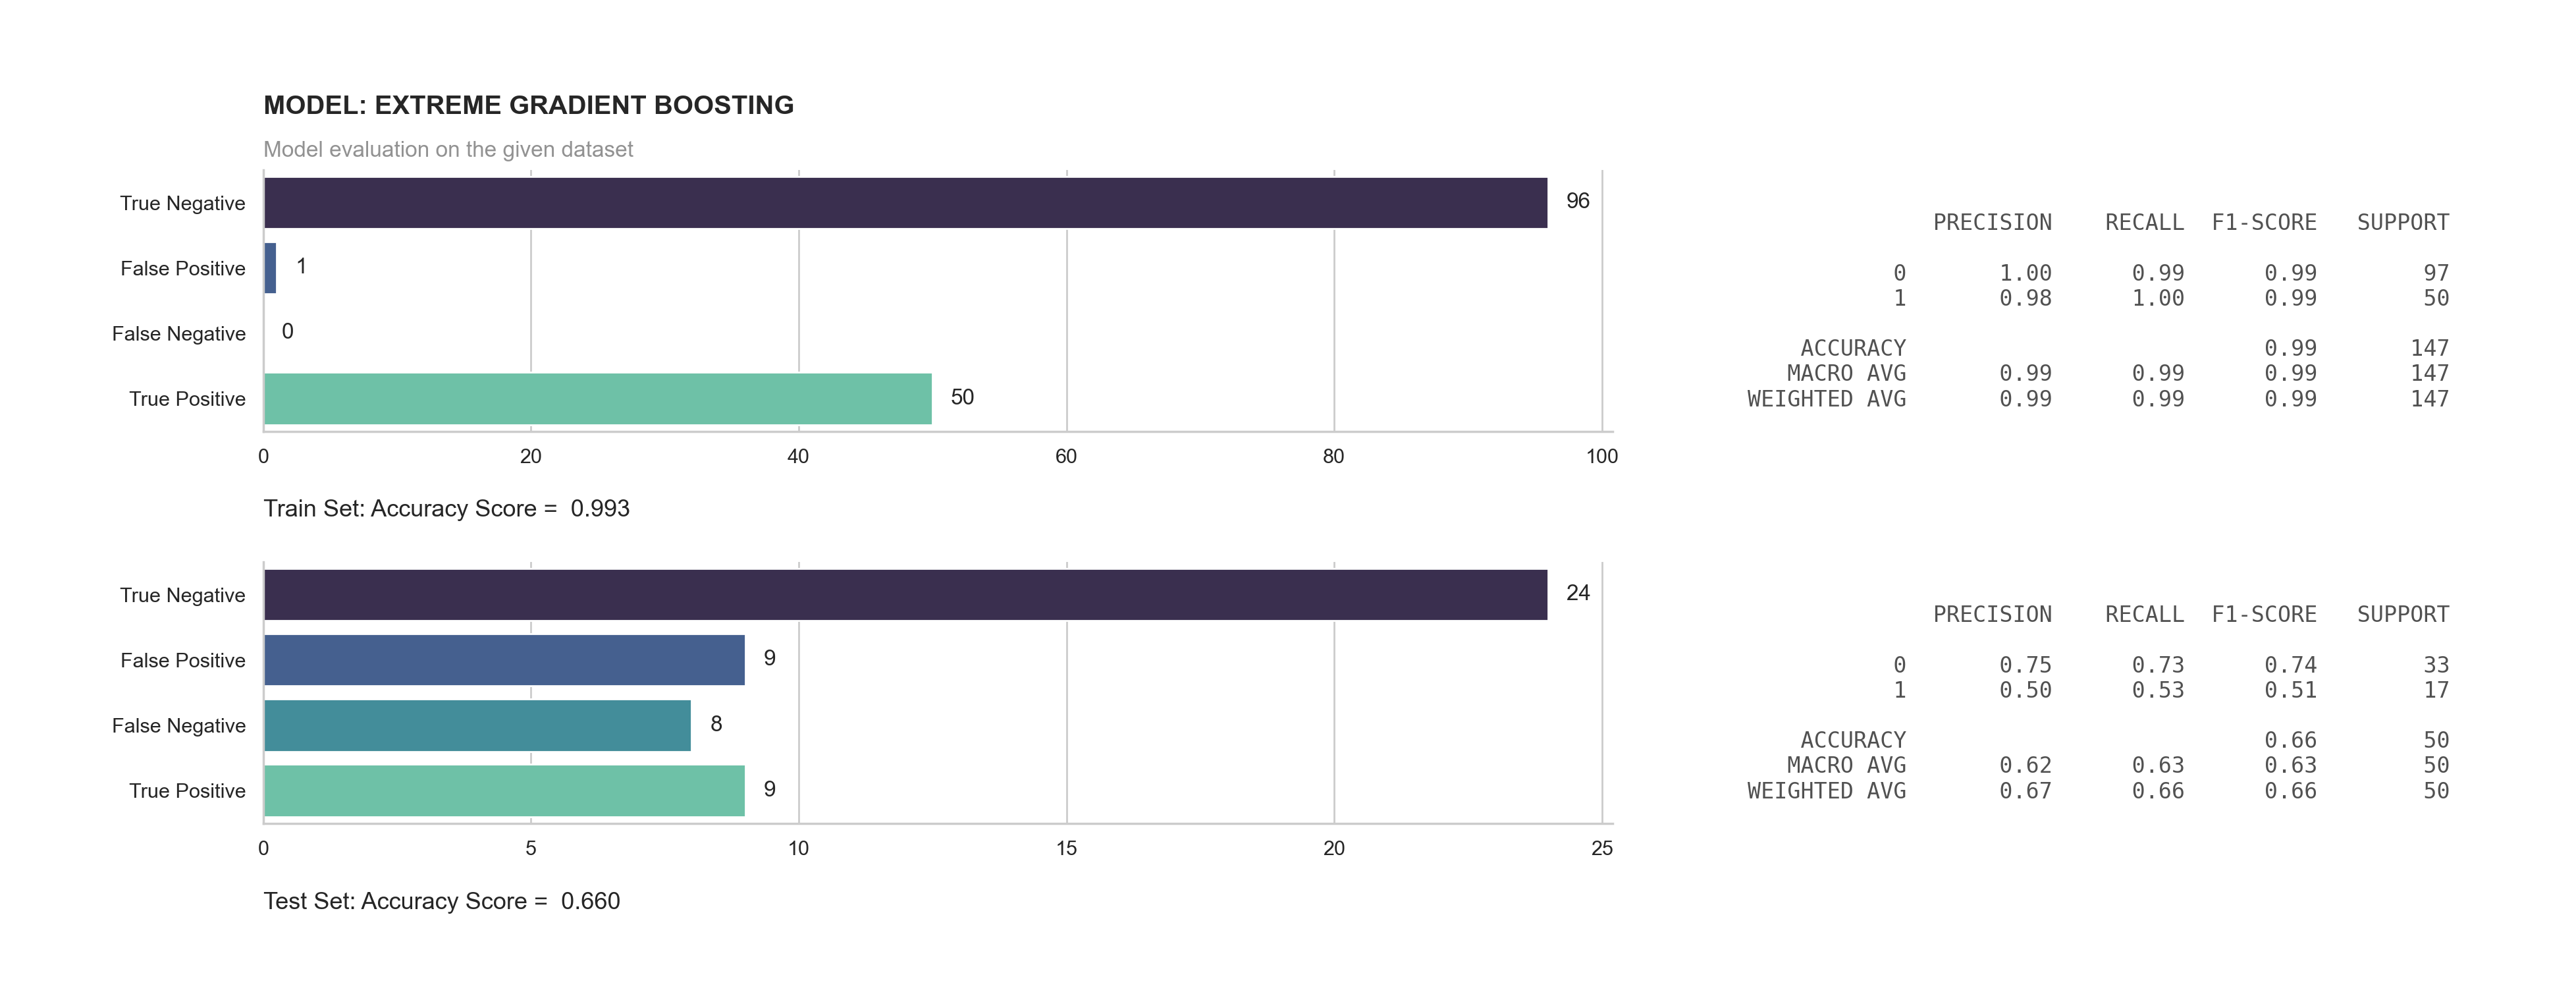

In [225]:
evaluate_model(model_xgboost)

## ROC-AUC Evaluation

The Receiver Operating Characteristic (ROC) curve and Area Under the Curve (AUC), a performance measurement for classification, tells us how much the models are capable of distinguishing between classes. With the higher area being the better in predicting 0 classes as 0 and 1 classes as 1.

Making a dataframe composed of the models' ROC elements. Specifically, the false positive rates and true positive rates.

In [226]:
def make_dataframe(model) -> pd.DataFrame:
    model_name = model.get_model_name()
    model_roc_curve = model.get_roc_curve()
    model_auc = model.get_auc()

    df = pd.DataFrame(dict(
        model = (f"{model_name.replace(' ', '_')}:{model_auc:.3f} ".split() * len(model_roc_curve['thresholds'])),
        fpr = model_roc_curve['fpr'], tpr = model_roc_curve['tpr'], ))

    df['model'].replace({'_': ' ', ':': ': '}, regex = True, inplace = True)

    return df

In [227]:
def make_roc_auc_dataframe_from_model_list(
    model_list: list[Type[ProcessModel]], model_names: dict = None,
    ) -> pd.DataFrame:

    model_names = {} if model_names is None else model_names

    df_dict = {}
    for model in model_list:
        df_dict.update({model.get_model_name(): make_dataframe(model)})

    df_dict_key_firstmodel = list(df_dict.keys())[0]
    df = df_dict[df_dict_key_firstmodel]
    for model_name, dataframe in df_dict.items():
        if model_name == df_dict_key_firstmodel:
            continue
        df = df.append(dataframe).reset_index(drop = True)

    df['model'].replace(model_names, regex = True, inplace = True)

    return df

With Support Vector Classifier's area under the curve value of 0.793 and it having a greater area than the other models, in choosing between the five, SVC is therefore prominent model.

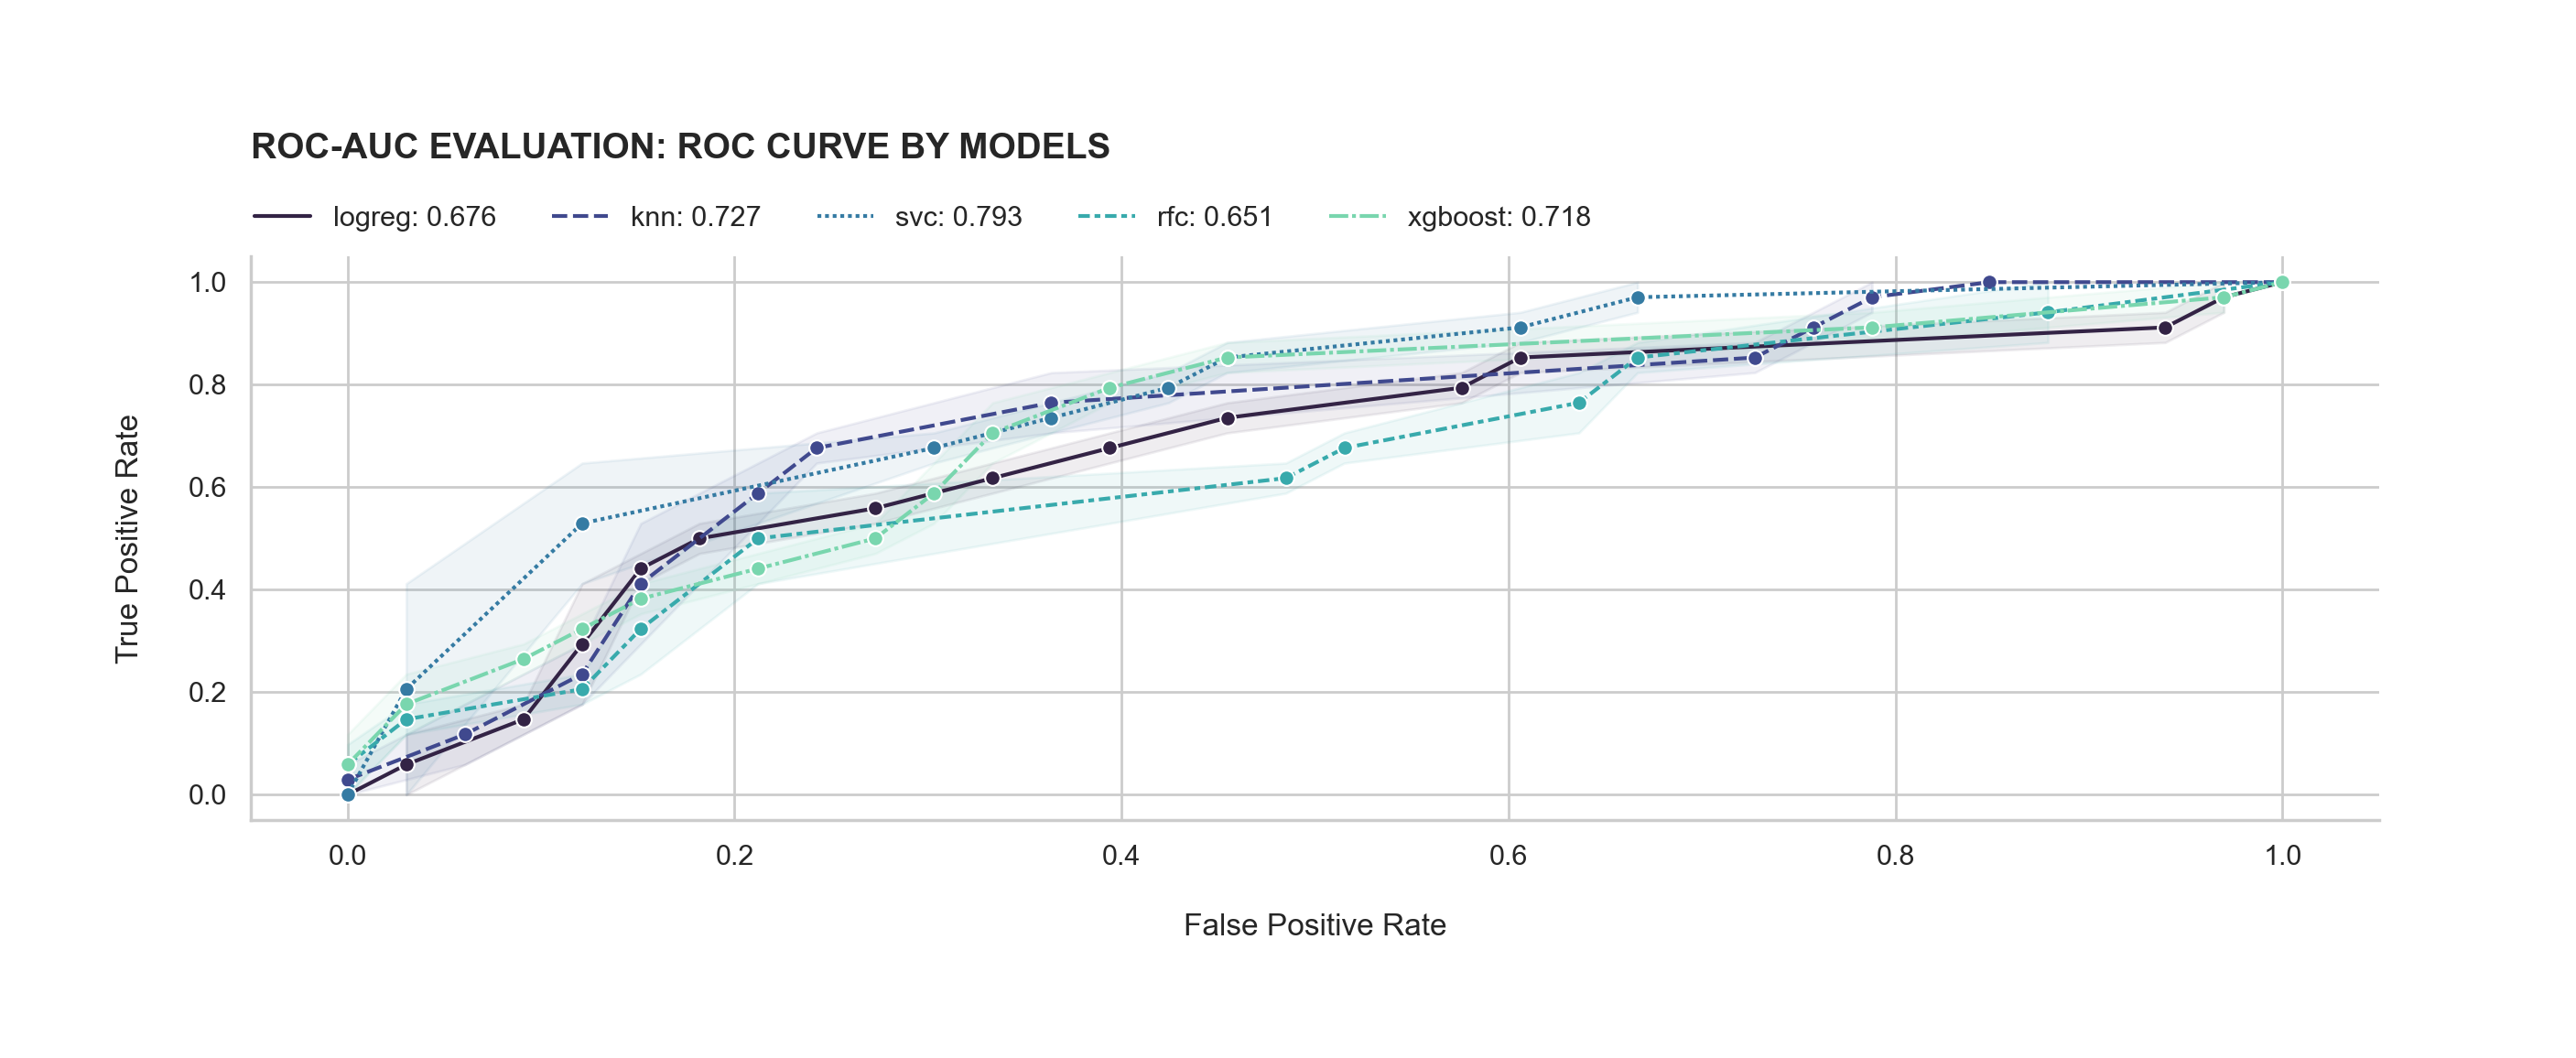

In [228]:
plot_lineplot(
    data = make_roc_auc_dataframe_from_model_list(
        model_list = [model_logreg, model_knn, model_svc, model_rfc, model_xgboost],
        model_names = {
            'Logistic Regression': 'logreg', 'K-Nearest Neighbors': 'knn',
            'Support Vector Classifier': 'svc', 'Random Forest Classifier': 'rfc',
            'Extreme Gradient Boosting': 'xgboost'}),
    x = 'fpr', y = 'tpr', hue = 'model', style = 'model',
    err_style = 'band', title = 'ROC-AUC Evaluation: ROC Curve by Models',
    x_label = 'False Positive Rate', y_label = 'True Positive Rate'
);